<center>
<h4>Diplomatura Datos 2023 - FaMAF - UNC</h4>
<h2>Aplicando Machine Learning para predicción de demanda</h2>
<h2>Análisis y Visualización</h2>
</center>
</left>
<h4>Tutor: Sebastián Ormaechea</h4>
</left>

# Objetivo general

El objetivo final de la mentoría es poder predecir el próximo mes de venta de materiales en los diferentes países y zonas en donde opera la compañía proveedora. Sin embargo, los prácticos que se realizarán en esta mentoría son aplicables a compañías de cualquier vertical de negocio que quiera predecir la demanda.

# Análisis y visualización. Objetivos de este notebook

Particularmente en este primer práctico, trabajaremos en la descarga del dataset y la exploración de su contenido. Para ello, visualizaremos los datos en formatos de tabla y figuras, buscando responder las preguntas disparadoras.
Tengan en cuenta que este proceso puede ser realizado de muchas formas distintas, por lo que pueden dar rienda suelta a su creatividad. 

# Requisitos de aprobación

- Trabajo grupal: El trabajo debe ser realizado entre los integrantes del grupo asignado y solo se entrega una versión por grupo.
- Git: Deben armar un repositorio git donde vayan cargando cada uno de los prácticos (notebooks) de la mentoría.
- Informe: Este debe quedar integrado en el mismo notebook por lo que recomiendo sigan un esquema que contenga las siguientes secciones. La idea es que queden plasmados los hallazgos significativos encontrados, lo cual sirve además de base para los videos intermedio y final de la mentoria.
              - Introducción
              - Presentación del Dataset 
              - Variables más relevantes o de interés 
              - Respuestas a preguntas disparadoras 
              - Relaciones interesantes entre variables 
              - Principales conclusiones          
- Prolijidad y Claridad: Es muy importante no solo resolver las consignas técnicamente sino tambien tener la claridad en la comunicación de los hallazgos, exponer las conclusiones y tener poder de síntesis. Por ello, la presentación debe ser acompañada de los gráficos adecuados y las referencias correspondientes. Los graficos deben hablar por si mismos.
- Extensión: No hay límite de longitud en los notebooks, pero es importante que eviten salidas o outputs excesivamente extensos de cada celda del notebook, salvo que estén debidamente justificados.  

Fecha de Entrega del práctico de Análisis y Visualización: 23/6/2023

Este práctico consiste en el análisis del conjunto de datos, identificar las variables más relevantes o de interés para el objetivo del proyecto y graficar sus distribuciones, identificar correlación entre variables, identificar outliers (valores atípicos), determinar qué hacer con el problema de valores faltantes (si los hay), identificar frecuencias de las variables categóricas, graficar distribución de la cantidad vendidas condicionada por otras variables, identificar materiales más vendidos y menos vendidos por categoría y por localidad.

Tengan en cuenta que hay columnas codificadas para ofuscar datos sensibles del data-owner. Por ejemplo, la columna "codGrupoMaterial4" posee 21 códigos que representan 21 categorías de materiales.

Preguntas disparadoras:

1- ¿Cuáles son las 3 provincias que más cantidad de materiales solicitan?

2- ¿Qué localidad es la que demanda más variedad de materiales?

3- ¿Cuál es la categoría de artículos que más cantidad solicitan los clientes?

4- ¿Qué categorías de materiales tipo 2 se venden en todos los países?

5- ¿Existe alguna categoría de materiales tipo 2 que NO se venda en alguna provincia argentina?.

6- ¿Cuáles son los 3 materiales que más cantidad solicitan los clientes?

7- ¿Cuál es el material que más cantidad solicitaron los clientes en cada mes del año 2021?

8- ¿Cuál es la localidad con mayor cantidad de sucursales? ¿y con menor cantidad de sucursales?

9- Indicar qué tipo de variable es cada una de las disponibles. ¿Cuáles consideraría categóricas y por qué?

10- Analizar la dispersión de valores del target para cada categoría de materiales tipo 2. 

11- Determine si hay outliers en cada una de las variables.

12- Determinar si hay valores faltantes en cada una de las variables. 

13- Calcule la media y la mediana de la cantidad de materiales vendidos por mes. 

14- ¿Cuál es la frecuencia de las variables categóricas?

15- ¿Cómo es la distribución de la variable target condicionada a otras 3 variables que decida seleccionar?

16- Indicar cuáles son las variables que tienen mayor correlación.

17- Establecer la probabilidad conjunta de que un pedido corresponda a Espesantes y sea para la localidad de Córdoba.

OPCIONAL: ¿Qué productos tienen una demanda estable a la largo del año y cuales tienen una demanda estacional? Tome solo los 5 productos más solicitados

# Lectura de los datos

In [447]:
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msg
import calendar
import scipy.stats as stats
import warnings
#from pandasql import sqldf

#pysqldf = lambda q: sqldf(q, globals())


sns.set_context('talk')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [448]:
file_name='df_ofuscado.csv'
df = pd.read_csv(file_name)
df

,Unnamed: 0,Periodo,Fecha,FechaPedido,NroDocPedido,PosPedido,CodMaterial,Cantidad,CodGrupoArt,GrupoArticulos,codGrupoMaterial2,codGrupoMaterial4,codGrupoMaterial5,Tipo_Precio,Departamento,Localidad,Provincia,Pais,CodCliente_of,CodSucCliente_of
0,1159,202111.0,2021-11-01,2021-11-01,514585.0,10.0,81074,480,14.0,Corrosivos,27.0,284.0,674.0,10.0,LOMAS DE ZAMORA,TEMPERLEY,Buenos Aires,AR,1,1
1,1380,201802.0,2018-02-01,2018-02-15,232161.0,930.0,8051,24,11.0,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2
2,1381,201808.0,2018-08-01,2018-08-15,260497.0,130.0,8051,24,11.0,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2
3,1382,201811.0,2018-11-01,2018-11-16,281670.0,790.0,8051,24,11.0,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2
4,1383,201901.0,2019-01-01,2019-01-21,281670.0,790.0,8051,-24,11.0,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107784,3780185,202106.0,2021-06-01,2021-06-11,479785.0,20.0,45115,6,11.0,Espesantes,26.0,124.0,228.0,9.0,ROSARIO,ROSARIO,Santa Fé,AR,1670,2243
107785,3780186,202106.0,2021-06-01,2021-06-24,481967.0,10.0,45114,24,11.0,Espesantes,26.0,124.0,228.0,9.0,QUILMES,BERNAL OESTE,Buenos Aires,AR,1671,2244
107786,3780187,202108.0,2021-08-01,2021-08-04,491293.0,10.0,45114,24,11.0,Espesantes,26.0,124.0,228.0,9.0,QUILMES,BERNAL OESTE,Buenos Aires,AR,1671,2244
107787,3780188,202106.0,2021-06-01,2021-06-24,481967.0,20.0,45115,12,11.0,Espesantes,26.0,124.0,228.0,9.0,QUILMES,BERNAL OESTE,Buenos Aires,AR,1671,2244


In [449]:
mpl.rcdefaults() 

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107789 entries, 0 to 107788
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         107789 non-null  int64  
 1   Periodo            107789 non-null  float64
 2   Fecha              107789 non-null  object 
 3   FechaPedido        107789 non-null  object 
 4   NroDocPedido       107789 non-null  float64
 5   PosPedido          107789 non-null  float64
 6   CodMaterial        107789 non-null  int64  
 7   Cantidad           107789 non-null  int64  
 8   CodGrupoArt        107789 non-null  float64
 9   GrupoArticulos     107789 non-null  object 
 10  codGrupoMaterial2  107789 non-null  float64
 11  codGrupoMaterial4  107789 non-null  float64
 12  codGrupoMaterial5  107789 non-null  float64
 13  Tipo_Precio        107789 non-null  float64
 14  Departamento       107789 non-null  object 
 15  Localidad          107789 non-null  object 
 16  Pr

Eliminamos algunas variables que creemos no son relevantes o repiten informacion que se tiene en el DF. 

In [451]:
df_filter = df.copy()
df_filter = df_filter.drop(['FechaPedido', 'Unnamed: 0', 'CodGrupoArt', 'Periodo'], axis=1)
df_filter

,Fecha,NroDocPedido,PosPedido,CodMaterial,Cantidad,GrupoArticulos,codGrupoMaterial2,codGrupoMaterial4,codGrupoMaterial5,Tipo_Precio,Departamento,Localidad,Provincia,Pais,CodCliente_of,CodSucCliente_of
0,2021-11-01,514585.0,10.0,81074,480,Corrosivos,27.0,284.0,674.0,10.0,LOMAS DE ZAMORA,TEMPERLEY,Buenos Aires,AR,1,1
1,2018-02-01,232161.0,930.0,8051,24,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2
2,2018-08-01,260497.0,130.0,8051,24,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2
3,2018-11-01,281670.0,790.0,8051,24,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2
4,2019-01-01,281670.0,790.0,8051,-24,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107784,2021-06-01,479785.0,20.0,45115,6,Espesantes,26.0,124.0,228.0,9.0,ROSARIO,ROSARIO,Santa Fé,AR,1670,2243
107785,2021-06-01,481967.0,10.0,45114,24,Espesantes,26.0,124.0,228.0,9.0,QUILMES,BERNAL OESTE,Buenos Aires,AR,1671,2244
107786,2021-08-01,491293.0,10.0,45114,24,Espesantes,26.0,124.0,228.0,9.0,QUILMES,BERNAL OESTE,Buenos Aires,AR,1671,2244
107787,2021-06-01,481967.0,20.0,45115,12,Espesantes,26.0,124.0,228.0,9.0,QUILMES,BERNAL OESTE,Buenos Aires,AR,1671,2244


In [452]:
# Convertir la columna 'Fecha' a un objeto de fecha
df_filter['Fecha'] = pd.to_datetime(df_filter['Fecha'])

# Crear nuevas columnas para el año, mes y día
df_filter['Año'] = df_filter['Fecha'].dt.year
df_filter['Mes'] = df_filter['Fecha'].dt.month

df_filter

,Fecha,NroDocPedido,PosPedido,CodMaterial,Cantidad,GrupoArticulos,codGrupoMaterial2,codGrupoMaterial4,codGrupoMaterial5,Tipo_Precio,Departamento,Localidad,Provincia,Pais,CodCliente_of,CodSucCliente_of,Año,Mes
0,2021-11-01,514585.0,10.0,81074,480,Corrosivos,27.0,284.0,674.0,10.0,LOMAS DE ZAMORA,TEMPERLEY,Buenos Aires,AR,1,1,2021,11
1,2018-02-01,232161.0,930.0,8051,24,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2,2018,2
2,2018-08-01,260497.0,130.0,8051,24,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2,2018,8
3,2018-11-01,281670.0,790.0,8051,24,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2,2018,11
4,2019-01-01,281670.0,790.0,8051,-24,Espesantes,15.0,139.0,291.0,1.0,TERCERO ARRIBA,OLIVA,Córdoba,AR,2,2,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107784,2021-06-01,479785.0,20.0,45115,6,Espesantes,26.0,124.0,228.0,9.0,ROSARIO,ROSARIO,Santa Fé,AR,1670,2243,2021,6
107785,2021-06-01,481967.0,10.0,45114,24,Espesantes,26.0,124.0,228.0,9.0,QUILMES,BERNAL OESTE,Buenos Aires,AR,1671,2244,2021,6
107786,2021-08-01,491293.0,10.0,45114,24,Espesantes,26.0,124.0,228.0,9.0,QUILMES,BERNAL OESTE,Buenos Aires,AR,1671,2244,2021,8
107787,2021-06-01,481967.0,20.0,45115,12,Espesantes,26.0,124.0,228.0,9.0,QUILMES,BERNAL OESTE,Buenos Aires,AR,1671,2244,2021,6


In [453]:
columnas = df_filter.columns
columnas

Index(['Fecha', 'NroDocPedido', 'PosPedido', 'CodMaterial', 'Cantidad',
       'GrupoArticulos', 'codGrupoMaterial2', 'codGrupoMaterial4',
       'codGrupoMaterial5', 'Tipo_Precio', 'Departamento', 'Localidad',
       'Provincia', 'Pais', 'CodCliente_of', 'CodSucCliente_of', 'Año', 'Mes'],
      dtype='object')

In [454]:
#Vamos a poner cada variable con el tipo de valor que corresponda.
df_filter['CodMaterial'] = df_filter['CodMaterial'].astype('category')


Ya tenemos los tipos arreglados, veamos si tenemoss valores faltantes:

<Axes: >

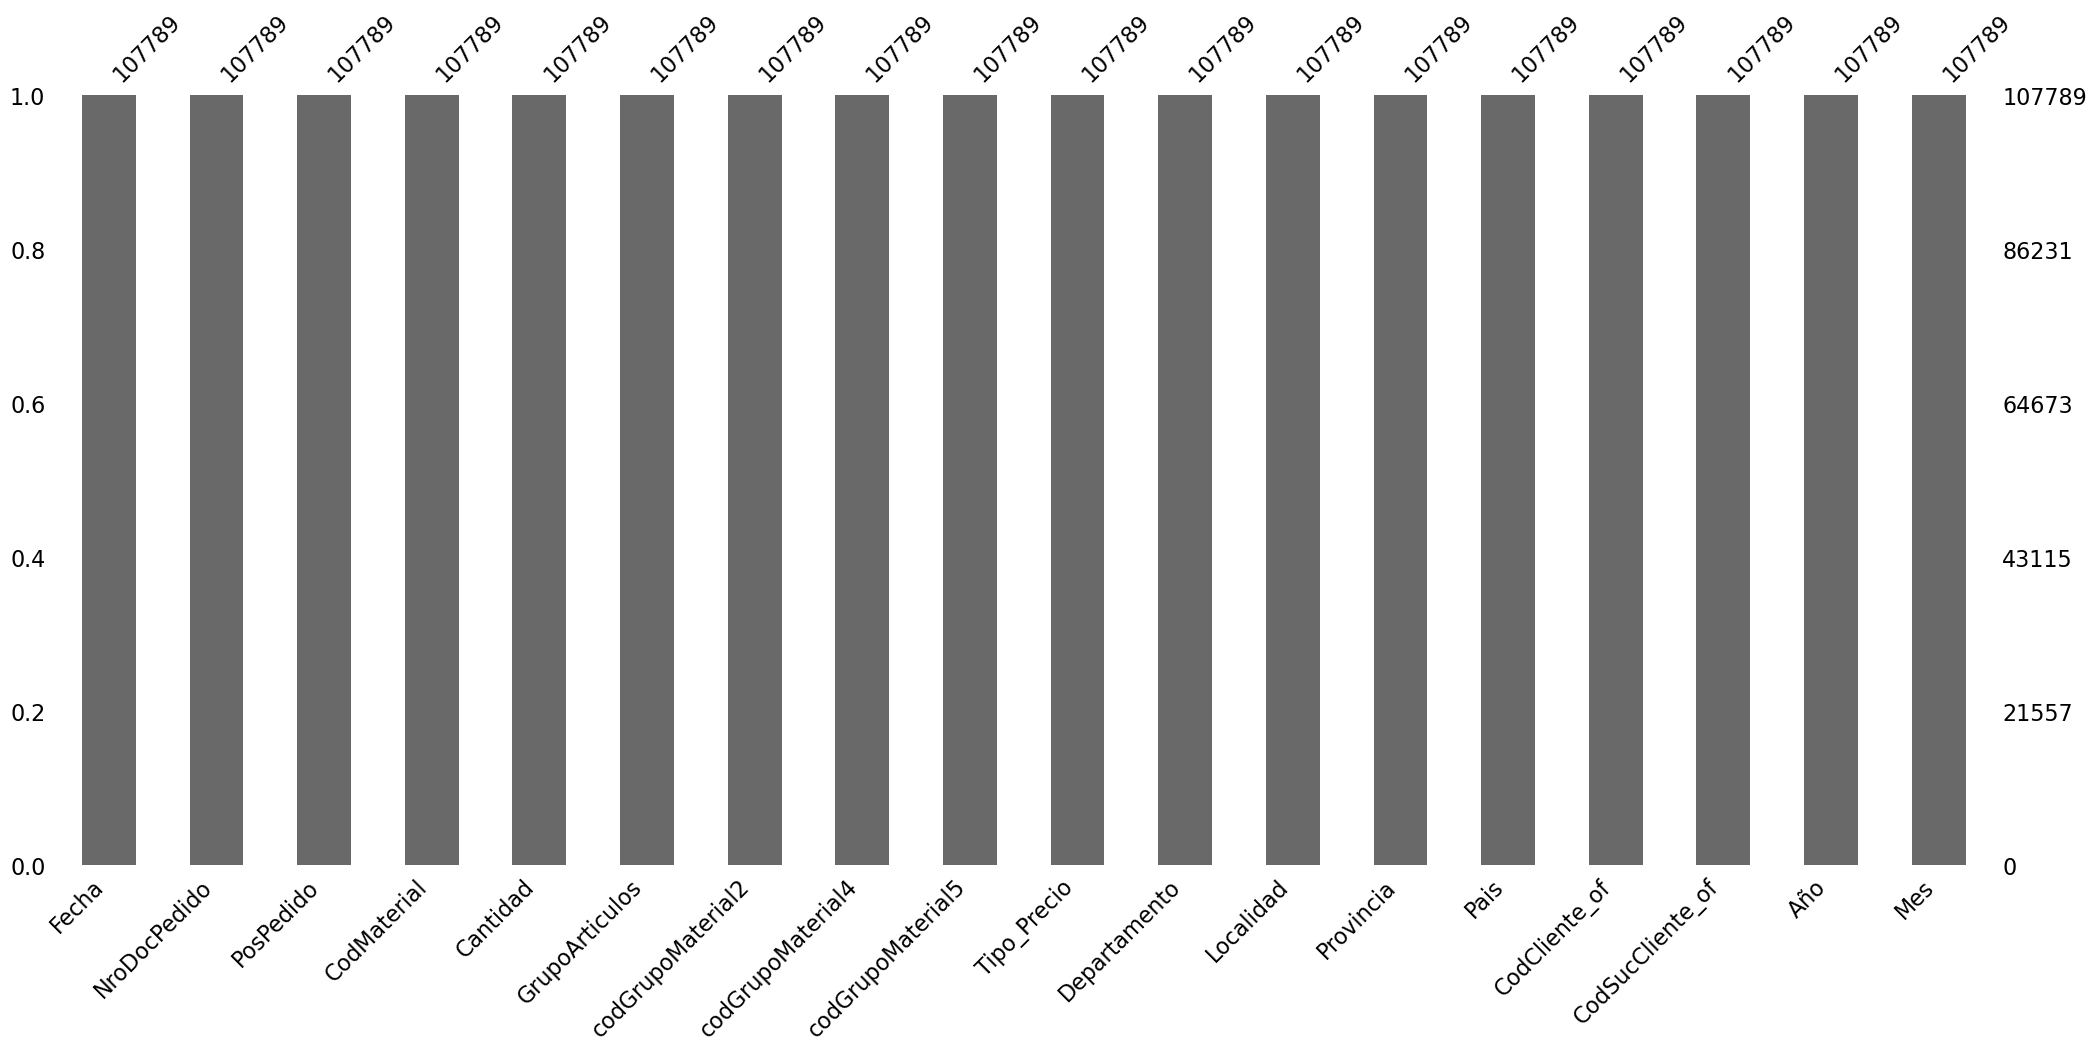

In [455]:
msg.bar(df_filter)

Vemos que no tenemos valores faltantes

In [456]:
df_filter.describe()

,NroDocPedido,PosPedido,Cantidad,codGrupoMaterial2,codGrupoMaterial4,codGrupoMaterial5,Tipo_Precio,CodCliente_of,CodSucCliente_of,Año,Mes
count,1.077890e+05,107789.000000,107789.000000,107789.000000,107789.000000,107789.000000,107789.000000,107789.000000,107789.000000,107789.000000,107789.000000
mean,4.083650e+05,238.039271,22.586841,20.036627,198.406127,442.718571,4.735585,778.022108,1023.043186,2019.485402,6.717374
std,1.535023e+06,366.893921,111.158557,5.764484,75.895584,189.879876,4.280831,508.705073,665.522073,1.053273,3.366332
min,1.845020e+05,1.000000,-3888.000000,15.000000,124.000000,228.000000,1.000000,1.000000,1.000000,2018.000000,1.000000
25%,2.994780e+05,30.000000,6.000000,15.000000,128.000000,276.000000,1.000000,279.000000,375.000000,2019.000000,4.000000
50%,3.708670e+05,100.000000,9.000000,15.000000,139.000000,291.000000,1.000000,780.000000,1012.000000,2019.000000,7.000000
75%,4.345740e+05,280.000000,16.000000,27.000000,284.000000,669.000000,10.000000,1205.000000,1569.000000,2020.000000,10.000000
max,6.018549e+07,2990.000000,4800.000000,27.000000,333.000000,683.000000,10.000000,1671.000000,2244.000000,2021.000000,12.000000


1- ¿Cuáles son las 3 provincias que más cantidad de materiales solicitan?

In [457]:
# ObtenemoS la lista de provincias únicas
provincias = df_filter['Provincia'].unique()

print("Lista de provincias en la base de datos:")
for provincia in provincias:
    print(provincia)

Lista de provincias en la base de datos:
Buenos Aires
Córdoba
Mendoza
Santa Fé
San Juan
Capital Federal
Chubut
Rio Negro
Neuquen
La Pampa
San Luis
Central
Tucumán
Formosa
Misiones
Entre Rios
Chaco
Corrientes
La Rioja
Santa Cruz
Montevideo
Tierra del Fuego
Jujuy
Santiago del Estero
Salta
Catamarca


In [458]:
# ContamoS la frecuencia de cada provincia
frecuencia_provincias = df_filter['Provincia'].value_counts()

# Vemos la frecuencia de cada provincia
print("Frecuencia de cada provincia en la base de datos:")
print(frecuencia_provincias)

Frecuencia de cada provincia en la base de datos:
Buenos Aires           35079
Santa Fé               19634
Córdoba                15954
Capital Federal         7980
Mendoza                 5852
Entre Rios              3102
Tucumán                 2496
Chaco                   2409
Corrientes              1540
Misiones                1540
San Luis                1360
Santiago del Estero     1339
La Pampa                1291
Formosa                 1141
San Juan                1031
Rio Negro                993
Neuquen                  959
Salta                    915
Chubut                   888
La Rioja                 670
Catamarca                503
Santa Cruz               345
Jujuy                    343
Montevideo               319
Tierra del Fuego          63
Central                   43
Name: Provincia, dtype: int64


In [459]:
#Vemos los paises que hay dentro del Dataset.
paises = df_filter['Pais'].unique()
print(paises)

['AR' 'PY' 'UY']


In [460]:
#Vemos como se componen los paises segun las provincias, para determinar de 
#donde son especificamente la provincia "Central" y "Montevideo".
provincias_paises = df_filter[[ 'Provincia', 'Pais']]
provincias_paises = provincias_paises.drop_duplicates()
provincias_paises

,Provincia,Pais
0,Buenos Aires,AR
1,Córdoba,AR
80,Mendoza,AR
127,Santa Fé,AR
376,San Juan,AR
439,Capital Federal,AR
485,Chubut,AR
518,Rio Negro,AR
1415,Neuquen,AR
1839,La Pampa,AR


In [461]:
# Calcular la cantidad total de materiales por provincia
provincias = df_filter .groupby('Provincia')['Cantidad'].sum()

# Obtener las tres provincias con mayor cantidad de materiales
top_tres_provincias = provincias.nlargest(3)

# Imprimir el resultado
print("Las tres provincias que más cantidad de materiales solicitan son:")
for provincia, cantidad in top_tres_provincias.items():
    print(f"{provincia}: {cantidad} materiales")

Las tres provincias que más cantidad de materiales solicitan son:
Buenos Aires: 959315 materiales
Santa Fé: 374180 materiales
Capital Federal: 341981 materiales


Antes de seguir, veremos el comportamiento de la variable cantidad, para determinar la proporcion de materiales devueltos, marcados como cantidades en negativo.

Primero veamos la cantidad de materiales que las provincias solicitan, SIN tener en cuenta las devoluciones:

In [462]:
# Funcion que formatea el ploteo, se elimina el eje y, se pone sobre las barras la cantidad.
def format_plot(ax, title):
    ax.figure.set_size_inches(12,6)
    ax.set_title(title)
    plt.ticklabel_format(style='plain', axis='y')
    for i in range(0, len(ax.containers)):
        ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])
    ax.get_yaxis().set_visible(False)

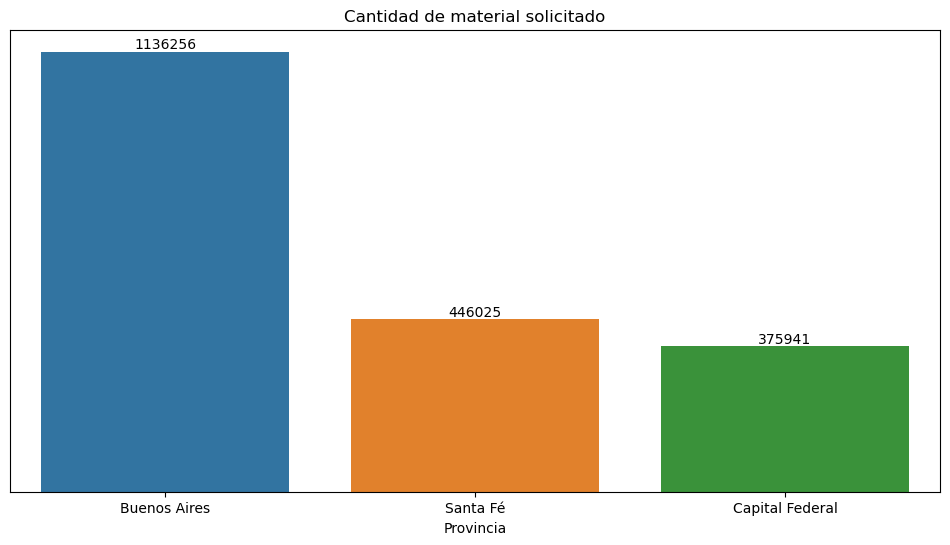

In [463]:
no_returned_quantity = df_filter[df_filter['Cantidad'] >= 0]

quantity_requested_no_returned = no_returned_quantity.groupby('Provincia').agg({"Cantidad":'sum'}).sort_values(by=['Cantidad'], ascending=False).reset_index()
ax = sns.barplot(data = quantity_requested_no_returned[:3], x = 'Provincia', y='Cantidad')
format_plot(ax,'Cantidad de material solicitado')

Veamos la cantidad de material con devoluciones y asi tener la cantidad efectiva de material pedido:

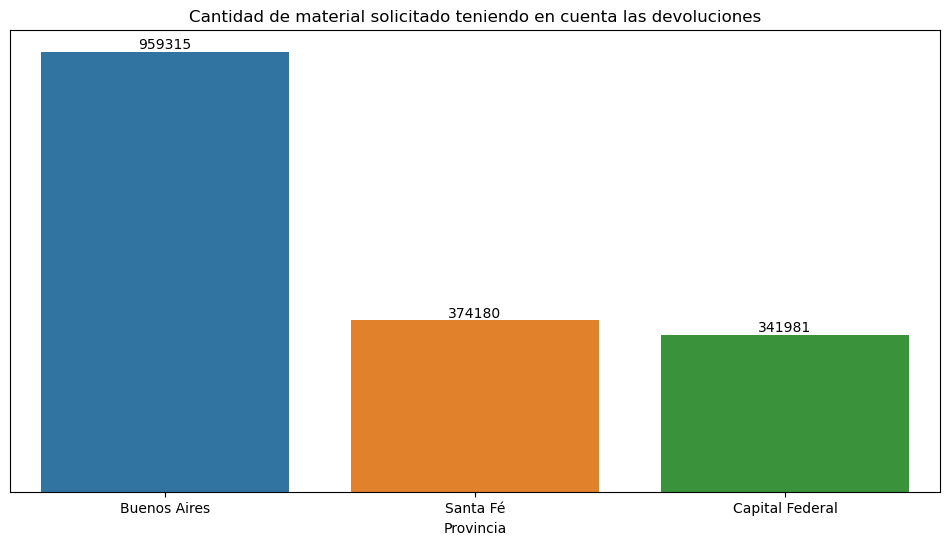

In [464]:
quantity_requested = df_filter.groupby('Provincia').agg({"Cantidad":'sum'}).sort_values(by=['Cantidad'], ascending=False).reset_index()
ax = sns.barplot(data = quantity_requested[:3], x = 'Provincia', y='Cantidad')
format_plot(ax,'Cantidad de material solicitado teniendo en cuenta las devoluciones')

Veamos ahora la cantidad devuelta y el porcentaje para cada provincia

In [465]:
returned_quantity = df_filter[df_filter['Cantidad'] <= 0]
quantity_requested_returned = returned_quantity.groupby('Provincia').agg({"Cantidad":'sum'}).sort_values(by=['Cantidad'],
                                                                                                         ascending=True)

materials_quantity = quantity_requested_no_returned.merge(quantity_requested_returned, how='left',
                                           left_on='Provincia', right_on='Provincia').reset_index()

materials_quantity.rename(columns={'Cantidad_x':'Cantidad_pedida', 'Cantidad_y':'Cantidad_devuelta'}, inplace=True)

# Obtenemosm el porcentaje de la cantidad de material devuelto.
materials_quantity['Porcentaje_devuelto'] = abs((materials_quantity['Cantidad_devuelta'] / materials_quantity['Cantidad_pedida'])
                                       * 100).round(2)
materials_quantity[:3]

,index,Provincia,Cantidad_pedida,Cantidad_devuelta,Porcentaje_devuelto
0,0,Buenos Aires,1136256,-176941,15.57
1,1,Santa Fé,446025,-71845,16.11
2,2,Capital Federal,375941,-33960,9.03


Haciendo un resumen de las cantidades general en una tabla:

In [466]:
materials_quantity = materials_quantity.merge(quantity_requested,how='right', left_on='Provincia', right_on='Provincia')
materials_quantity.rename(columns={'Cantidad':'Cantidad_efectiva'}, inplace=True)
materials_quantity[['Provincia', 'Cantidad_pedida', 'Cantidad_devuelta', 'Cantidad_efectiva', 'Porcentaje_devuelto']][:3]

,Provincia,Cantidad_pedida,Cantidad_devuelta,Cantidad_efectiva,Porcentaje_devuelto
0,Buenos Aires,1136256,-176941,959315,15.57
1,Santa Fé,446025,-71845,374180,16.11
2,Capital Federal,375941,-33960,341981,9.03


2- ¿Qué localidad es la que demanda más variedad de materiales?



In [467]:
#Agrupamos los datos por localidad y contamos la cantidad de materiales diferentes en cada localidad:
localidad_variedad = df_filter.groupby('Localidad')['CodMaterial'].nunique().reset_index()

#Ordenamos el DataFrame en orden descendente según la cantidad de variedad de materiales:
localidad_variedad = localidad_variedad.sort_values('CodMaterial', ascending=False)

localidad_variedad

,Localidad,CodMaterial
468,ROSARIO,111
454,RESISTENCIA,105
149,CORDOBA,94
288,LA PLATA,87
493,SAN FRANCISCO,86
...,...,...
608,VILLA IRIS,1
400,PABLO PODESTA,1
446,RANELAGH,1
402,PAMPA DEL INFIERNO,1


In [468]:
#Obtenemos la localidad con la mayor variedad de materiales:
localidad_demandante = localidad_variedad.iloc[0]['Localidad']

print(f'La localidad con mas variedad de demanda es {localidad_demandante}')

La localidad con mas variedad de demanda es ROSARIO


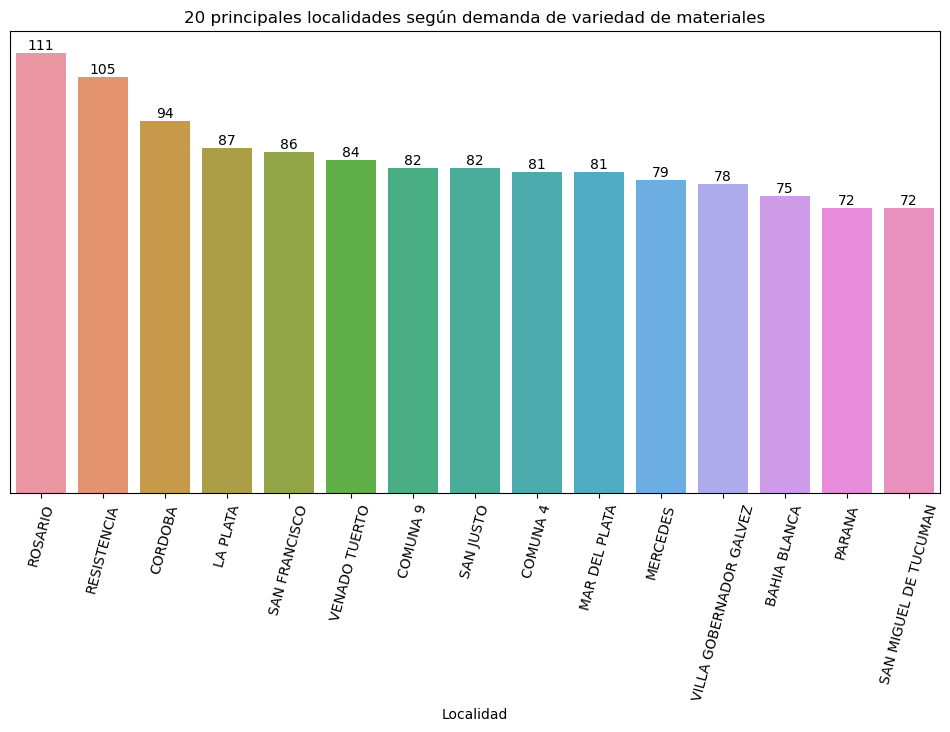

In [469]:
# Calculamos y graficamos la variedad de materiales por las principales 15 localidades
variedad_materiales = df_filter.groupby('Localidad')['CodMaterial'].nunique().nlargest(15).reset_index()
ax = sns.barplot(variedad_materiales, x='Localidad', y='CodMaterial')
format_plot(ax, '20 principales localidades según demanda de variedad de materiales')

plt.xticks(rotation=75);

3- ¿Cuál es la categoría de artículos que más cantidad solicitan los clientes?



In [470]:
# Calculamos la cantidad total de artículos por categoría
cantidad_por_categoria = df_filter.groupby('GrupoArticulos')['Cantidad'].sum()

cantidad_por_categoria

GrupoArticulos
Corrosivos    1585970
Espesantes     848643
Name: Cantidad, dtype: int64

In [471]:
# Obtenemos la categoría con la mayor cantidad solicitada
categoria_mas_solicitada = cantidad_por_categoria.idxmax()

print("La categoría de artículos que más cantidad solicitan los clientes es:", categoria_mas_solicitada)

La categoría de artículos que más cantidad solicitan los clientes es: Corrosivos


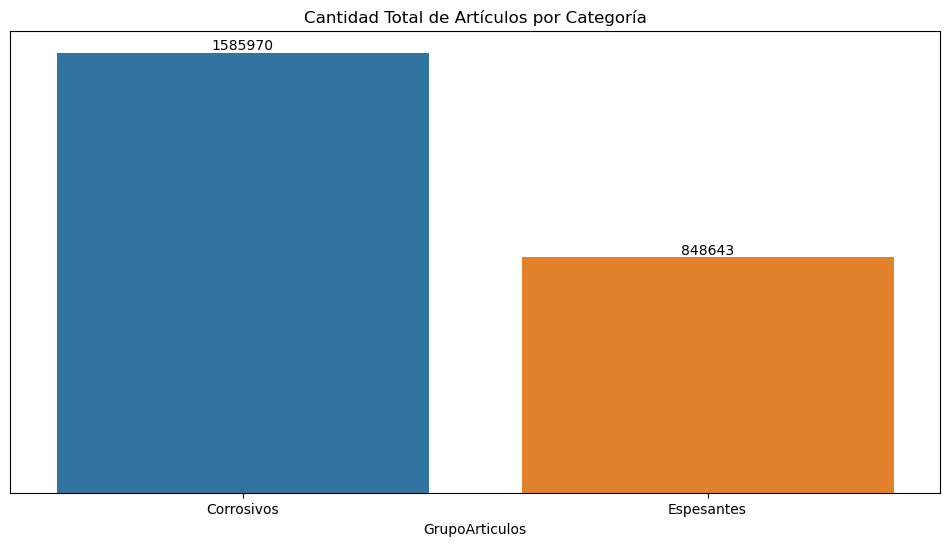

In [472]:
# Calcular la cantidad total de artículos por categoría
cantidad_por_categoria = df_filter.groupby('GrupoArticulos')['Cantidad'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=cantidad_por_categoria, x='GrupoArticulos', y='Cantidad')
format_plot(ax, 'Cantidad Total de Artículos por Categoría');

Los corrosivos es 1,8 veces mas que los espesantes

4- ¿Qué categorías de materiales tipo 2 se venden en todos los países?



In [473]:
# Lista de categorías y su conteo
categorias = df_filter['codGrupoMaterial2'].value_counts()

print("Categorías de 'codGrupoMaterial2' y veces que se repiten:")
for categoria, conteo in categorias.items():
    print(categoria, conteo)

Categorías de 'codGrupoMaterial2' y veces que se repiten:
15.0 61043
27.0 28687
26.0 18059


In [474]:
# Obtener la lista de categorías y su conteo por país
categorias_por_pais = df_filter.groupby('Pais')['codGrupoMaterial2'].value_counts()

# Mostramos las categorías y su conteo por país
print("Categorías de 'codGrupoMaterial2' y su conteo por país:")
for (pais, categoria), conteo in categorias_por_pais.items():
    print("País:", pais)
    print("Categoría:", categoria)
    print("Conteo:", conteo)
    print()

Categorías de 'codGrupoMaterial2' y su conteo por país:
País: AR
Categoría: 15.0
Conteo: 60681

País: AR
Categoría: 27.0
Conteo: 28687

País: AR
Categoría: 26.0
Conteo: 18059

País: PY
Categoría: 15.0
Conteo: 43

País: UY
Categoría: 15.0
Conteo: 319



In [475]:
# Obtenemos la categoría que más se vende en todos los países
categoria_mas_vendida = df_filter['codGrupoMaterial2'].value_counts().idxmax()

print("La categoría que más se vende en todos los países es:", categoria_mas_vendida)

La categoría que más se vende en todos los países es: 15.0


In [476]:
#Vamos a graficar, para lo cual tenemos que hacer una pequeña transformacion.
# Creamos un diccionario de mapeo de valores numéricos a categorías
mapeo = {15: 'Cod15', 26: 'Cod26', 27: 'Cod27'}

# Aplicar el mapeo a la columna "codGrupoMaterial2" para convertirla en categórica
df['codGrupoMaterial2'] = df['codGrupoMaterial2'].map(mapeo).astype('category')

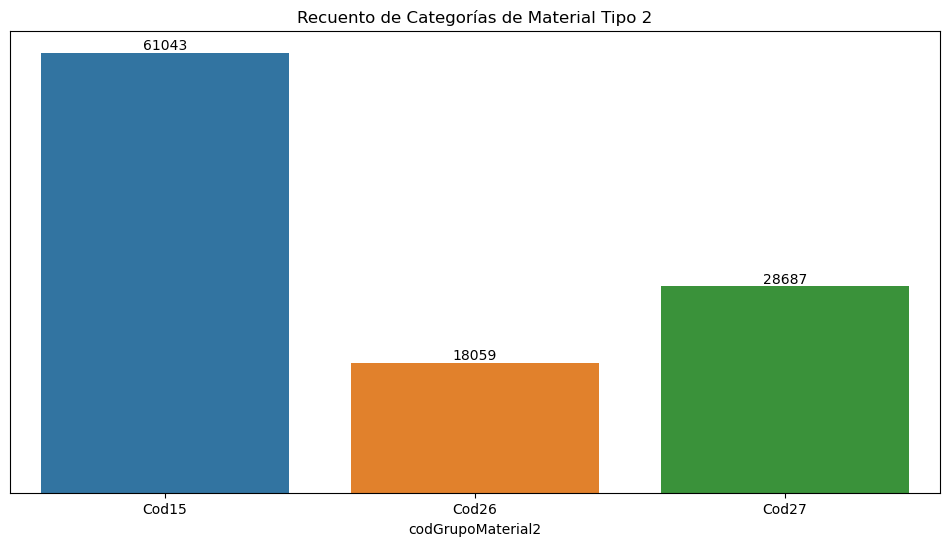

In [477]:
conteo_categorias = df['codGrupoMaterial2'].value_counts().reset_index()
conteo_categorias.rename(columns={'index': 'codGrupoMaterial2', 'codGrupoMaterial2':'Cantidad'}, inplace=True)
ax = sns.barplot(conteo_categorias, x='codGrupoMaterial2', y='Cantidad')
format_plot(ax, 'Recuento de Categorías de Material Tipo 2');

La suma de las ventas de las categorias 26 y 27, no alcazan a las de la categoria 15. Son solo el 77% de esta.

5- ¿Existe alguna categoría de materiales tipo 2 que NO se venda en alguna provincia argentina?.



In [478]:
# Filtramos la base de datos excluyendo las provincias 'Central' y 'Montevideo'
df_filtered = df_filter[df_filter['Pais'] == 'AR'][['Provincia', 'codGrupoMaterial2']]
df_filtered

,Provincia,codGrupoMaterial2
0,Buenos Aires,27.0
1,Córdoba,15.0
2,Córdoba,15.0
3,Córdoba,15.0
4,Córdoba,15.0
...,...,...
107784,Santa Fé,26.0
107785,Buenos Aires,26.0
107786,Buenos Aires,26.0
107787,Buenos Aires,26.0


In [479]:
df_filtered.drop_duplicates().groupby('Provincia')['codGrupoMaterial2'].apply(list).reset_index()

,Provincia,codGrupoMaterial2
0,Buenos Aires,"[27.0, 15.0, 26.0]"
1,Capital Federal,"[15.0, 27.0, 26.0]"
2,Catamarca,"[15.0, 27.0, 26.0]"
3,Chaco,"[15.0, 27.0, 26.0]"
4,Chubut,"[15.0, 27.0, 26.0]"
5,Corrientes,"[15.0, 27.0, 26.0]"
6,Córdoba,"[15.0, 27.0, 26.0]"
7,Entre Rios,"[15.0, 27.0, 26.0]"
8,Formosa,"[15.0, 27.0, 26.0]"
9,Jujuy,"[15.0, 27.0, 26.0]"


In [480]:
# En medida de resumen y mas facil a la vista, tenemos:
only_argentina = df_filter[df_filter['Pais']=='AR']
only_argentina_grouped = only_argentina.groupby('codGrupoMaterial2')['Provincia'].nunique().to_frame().reset_index()

only_argentina_grouped.rename(columns={'codGrupoMaterial2': 'Categoria', 'Provincia':'CantidadDeProvincias'}, inplace=True)
only_argentina_grouped

,Categoria,CantidadDeProvincias
0,15.0,24
1,26.0,24
2,27.0,24


Todas las categorias se venden en todas las provincias Argentinas


6- ¿Cuáles son los 3 materiales que más cantidad solicitan los clientes?



In [481]:
conteo_materiales = df_filter[['CodMaterial','Cantidad']]
conteo_materiales

,CodMaterial,Cantidad
0,81074,480
1,8051,24
2,8051,24
3,8051,24
4,8051,-24
...,...,...
107784,45115,6
107785,45114,24
107786,45114,24
107787,45115,12


In [482]:
conteo_materiales.groupby('CodMaterial')['Cantidad'].sum().sort_values(ascending=False).head(3).to_frame()

,Cantidad
CodMaterial,
81074,913368
81054,255027
7604,137497


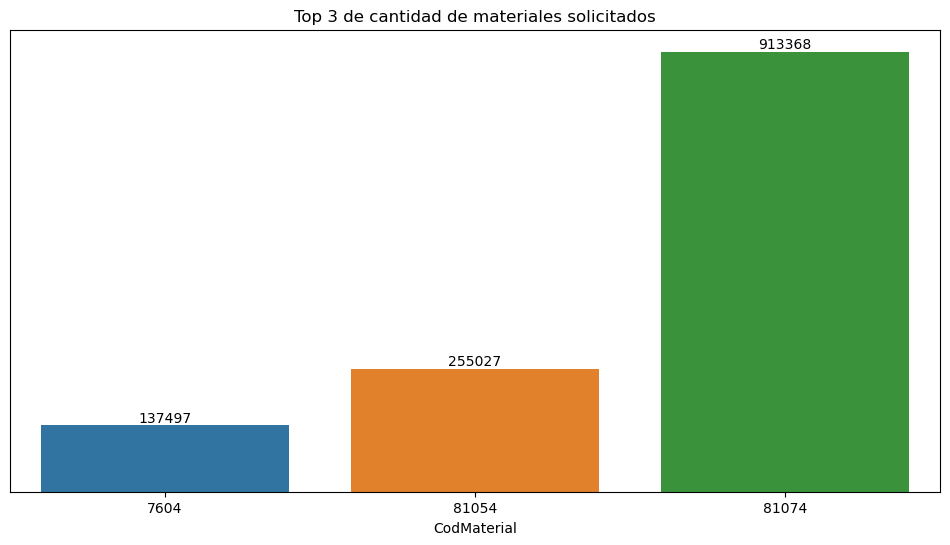

In [483]:
materials_quantity = df.groupby('CodMaterial').agg({'Cantidad':'sum'}).sort_values(by='Cantidad', ascending=False).reset_index()[:3]
ax = sns.barplot(materials_quantity, x='CodMaterial', y='Cantidad')
format_plot(ax, 'Top 3 de cantidad de materiales solicitados')

Vemos que por mucho, el material numero 81074 es el material con mas cantidad vendida. El segundo material es el 81054 que fue 3,5 veces menos vendido.

7- ¿Cuál es el material que más cantidad solicitaron los clientes en cada mes del año 2021?



In [484]:
df_filter.columns

Index(['Fecha', 'NroDocPedido', 'PosPedido', 'CodMaterial', 'Cantidad',
       'GrupoArticulos', 'codGrupoMaterial2', 'codGrupoMaterial4',
       'codGrupoMaterial5', 'Tipo_Precio', 'Departamento', 'Localidad',
       'Provincia', 'Pais', 'CodCliente_of', 'CodSucCliente_of', 'Año', 'Mes'],
      dtype='object')

In [485]:
# Filtramos los datos del año 2021
df_2021 = df_filter[df_filter['Año'] == 2021]

# Obtenemos la cantidad de materiales solicitados por material, mes y año 2021
grouped_months = df_2021.groupby(['CodMaterial', df_2021['Mes']])['Cantidad'].sum().reset_index()

# Renombramos las columnas
grouped_months.columns = ['CodMaterial', 'Mes', 'Cantidad']

# Ordenamos los datos por cantidad de forma descendente
grouped_months = grouped_months.sort_values('Cantidad', ascending=False)

grouped_months

,CodMaterial,Mes,Cantidad
1290,81074,4,30006
1296,81074,10,29952
1293,81074,7,27120
1288,81074,2,25981
1289,81074,3,19848
...,...,...,...
54,7614,11,-49
569,7865,9,-72
967,80115,11,-78
59,7615,5,-96


In [486]:
# Obtenemos el índice del material más solicitado por mes
idx = grouped_months.groupby('Mes')['Cantidad'].idxmax()

# Filtramos el DataFrame con los materiales más solicitados por mes
grouped_months = grouped_months.loc[idx].reset_index(drop=True)

# Reemplazamos los valores del mes, por su nombre para mejor visualizacion
month_dict = {1: 'Enero', 2: 'Febrero',3: 'Marzo', 4: 'Abril',5: 'Mayo', 6: 'Junio',7: 'Julio',
              8: 'Agosto',9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
grouped_months.Mes.replace(month_dict, inplace=True)
grouped_months

,CodMaterial,Mes,Cantidad
0,81074,Enero,19620
1,81074,Febrero,25981
2,81074,Marzo,19848
3,81074,Abril,30006
4,81074,Mayo,8604
5,81074,Junio,10236
6,81074,Julio,27120
7,81074,Agosto,15882
8,81074,Septiembre,18612
9,81074,Octubre,29952


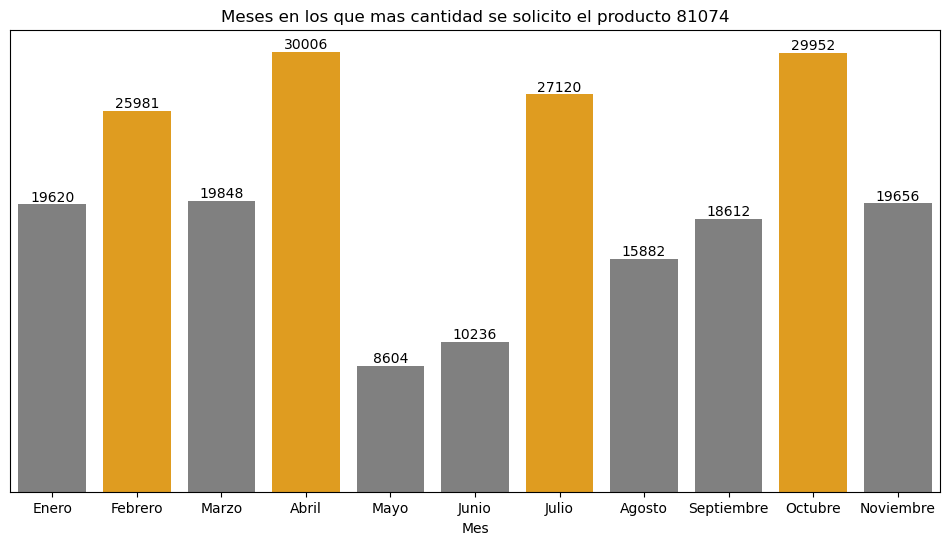

In [487]:
cols = ['grey' if (x < grouped_months.Cantidad.mean()) else 'orange' for x in grouped_months.Cantidad]
ax = sns.barplot(grouped_months, x='Mes', y='Cantidad', palette = cols)
format_plot(ax, 'Meses en los que mas cantidad se solicito el producto 81074')


Podemos ver que en los primeros cuatro meses del año, se solicita mas material en comparacion de los ultimos cuatro.

In [488]:
#Recuento de veces que se pidieron los materiales, difiere en cual es la cantidad que se pidio. 
# Obtenemos el material más solicitado por mes con su cantidad
materiales_mas_solicitados = df_2021.groupby(df_2021['Mes']).apply(lambda x: x['CodMaterial'].value_counts().nlargest(1)).reset_index()
materiales_mas_solicitados.columns = ['Mes', 'CodMaterial', 'Cantidad']

# CreamoS un DataFrame para almacenar los resultados
df_resultado = pd.DataFrame(columns=['Mes', 'CodMaterial', 'Cantidad'])

# Agregar cada fila al DataFrame de resultados
for _, row in materiales_mas_solicitados.iterrows():
    mes = row['Mes']
    material = row['CodMaterial']
    cantidad = row['Cantidad']
    df_resultado = df_resultado.append({'Mes': mes, 'CodMaterial': material, 'Cantidad': cantidad}, ignore_index=True)

df_resultado

,Mes,CodMaterial,Cantidad
0,1,81074,200
1,2,7604,221
2,3,7604,210
3,4,81074,234
4,5,81074,148
5,6,7604,208
6,7,7604,246
7,8,7604,197
8,9,7604,223
9,10,81074,303


8- ¿Cuál es la localidad con mayor cantidad de sucursales? ¿y con menor cantidad de sucursales?

In [489]:
df_suc_x_locali = df_filter[['Localidad', 'CodSucCliente_of']].drop_duplicates()
df_suc_x_locali

,Localidad,CodSucCliente_of
0,TEMPERLEY,1
1,OLIVA,2
80,TUNUYAN,3
127,SAN LORENZO,4
189,CORDOBA,5
...,...,...
107778,SAN LUIS,2240
107780,COMUNA 14,2241
107781,CARAPACHAY,2242
107783,ROSARIO,2243


In [490]:
# Contamos la cantidad de sucursales por localidad
sucursales_por_localidad = df_suc_x_locali['Localidad'].value_counts()

# Obtenemos primero todas las localidades distintas en el DataFrame
localidades_totales = df_suc_x_locali['Localidad'].unique()

# Vemos las localidades con sucursales
localidades_con_sucursales = sucursales_por_localidad.index

# Controlamos si alguna de las localidades no tiene sucursales
localidades_sin_sucursales = np.setdiff1d(localidades_totales, localidades_con_sucursales)


if len(localidades_sin_sucursales) > 0:
    print("Localidades sin sucursales:")
    for localidad in localidades_sin_sucursales:
        print(localidad)
else:
    print("Todas las localidades tienen al menos una sucursal.")

Todas las localidades tienen al menos una sucursal.


A partir de aca vemos cual es la que tiene mayor sucursales y cual (o cuales), las que menos tienen.

In [491]:
# Obtenemos el recuento de valores por cada localidad
recuento_localidad = df_suc_x_locali['Localidad'].value_counts()

# Obtenemos medidas descriptivas de la columna "Localidad"
medidas_descriptivas = recuento_localidad.describe()

print("Medidas descriptivas de la columna 'Localidad':")
print(medidas_descriptivas)



Medidas descriptivas de la columna 'Localidad':
count    635.000000
mean       3.533858
std        7.979273
min        1.000000
25%        1.000000
50%        2.000000
75%        3.500000
max      145.000000
Name: Localidad, dtype: float64


Vemos que la cantidad maxima de sucursales en una localidad es 145 y el minimo es 1.

In [492]:
# Obtenemos la localidad con mayor cantidad de sucursales
localidad_max_sucursales = sucursales_por_localidad.idxmax()
cantidad_max_sucursales = sucursales_por_localidad.max()

# Obtenemos la localidad con menor cantidad de sucursales (se verifico )
localidad_min_sucursales = sucursales_por_localidad[sucursales_por_localidad == 1].index


print(f"Localidad con mayor cantidad de sucursales: {localidad_max_sucursales} (Cantidad: {cantidad_max_sucursales})")
print("Localidades con una sola sucursal:")
for localidad in localidad_min_sucursales:
    print(localidad)

Localidad con mayor cantidad de sucursales: CORDOBA (Cantidad: 145)
Localidades con una sola sucursal:
TOLEDO
CORZUELA
EL CRISPIN
EMBARCACION
PUERTO DESEADO
RIO TURBIO
QUEMU QUEMU
HASENKAMP
CUARTEL V
MORTEROS
NORBERTO DE LA RIESTRA
VALLE VIEJO
GENERAL MOSCONI
COMANDANTE LUIS PIEDRA BUENA
LAS LAJAS
SAN BASILIO
ASCENSION
CURUZU CUATIA
PURMAMARCA
SAN PATRICIO DEL CHAÑAR
VILLA DEL TOTORAL
BELLA ITALIA
SALTO
PEREZ MILLAN
COLONIA SANTA ROSA
GARUHAPE
AYACUCHO
LEONES
9 DE ABRIL
VILLA IRIS
PEDERNALES
GOBERNADOR ROCA
EMILIO V. BUNGE
LOMA VERDE
BILLINGHURST
TORRES
CORONEL BOGADO
TABAY
MONTE COMAN
SAN LUIS DEL PALMAR
ORIENTE
ROMANG
COLONIA LIEBIG S
RAMALLO
GENERAL LEVALLE
SANTOS LUGARES
CATRIEL
LA REJA
Lomas del Mirador
ALTA GRACIA
VILLA FRANCIA
ADOLFO GONZALES CHAVES
ALDO BONZI
LOS CORRALITOS
LEZAMA
MONTE CHINGOLO
MATHEU
PUERTO SAN JULIAN
RAFAEL CALZADA
MURPHY
MONTE CASEROS
VILLA DOMINICO
VILLA ATUEL NORTE
CAÑUELAS
BRINKMANN
ESTACION JUAREZ CELMAN
ONCATIVO
BENAVIDEZ
CARLOS PELLEGRINI
Villa Balles

9- Indicar qué tipo de variable es cada una de las disponibles. ¿Cuáles consideraría categóricas y por qué? 

In [493]:
df_filter.nunique()

Fecha                   47
NroDocPedido         39183
PosPedido              381
CodMaterial            178
Cantidad               337
GrupoArticulos           2
codGrupoMaterial2        3
codGrupoMaterial4       21
codGrupoMaterial5       54
Tipo_Precio              3
Departamento           300
Localidad              635
Provincia               26
Pais                     3
CodCliente_of         1671
CodSucCliente_of      2244
Año                      4
Mes                     12
dtype: int64

In [494]:
for col in df_filter.columns:
    print(f'la variable {col} es de tipo {df_filter[col].dtypes}\n')

la variable Fecha es de tipo datetime64[ns]

la variable NroDocPedido es de tipo float64

la variable PosPedido es de tipo float64

la variable CodMaterial es de tipo category

la variable Cantidad es de tipo int64

la variable GrupoArticulos es de tipo object

la variable codGrupoMaterial2 es de tipo float64

la variable codGrupoMaterial4 es de tipo float64

la variable codGrupoMaterial5 es de tipo float64

la variable Tipo_Precio es de tipo float64

la variable Departamento es de tipo object

la variable Localidad es de tipo object

la variable Provincia es de tipo object

la variable Pais es de tipo object

la variable CodCliente_of es de tipo int64

la variable CodSucCliente_of es de tipo int64

la variable Año es de tipo int64

la variable Mes es de tipo int64



In [495]:
colum_cate = list(df_filter.columns[df_filter.dtypes == 'object']) + ['Tipo_Precio']
for col in colum_cate:
    df_filter[col] = df_filter[col].astype('category')

In [496]:
df_filter.dtypes

Fecha                datetime64[ns]
NroDocPedido                float64
PosPedido                   float64
CodMaterial                category
Cantidad                      int64
GrupoArticulos             category
codGrupoMaterial2           float64
codGrupoMaterial4           float64
codGrupoMaterial5           float64
Tipo_Precio                category
Departamento               category
Localidad                  category
Provincia                  category
Pais                       category
CodCliente_of                 int64
CodSucCliente_of              int64
Año                           int64
Mes                           int64
dtype: object

### <u>CATEGORICAS:</u>
* CodMaterial: Esta columna es un código o identificador para los materiales.Se considerar como una variable categórica.
* GrupoArticulos: Nombre de cada grupo de artículos. Variable categórica.
* codGrupoMaterial2: Identificador del grupo de materiales N°2. Variable categórica.
* codGrupoMaterial4: Identificador del grupo de materiales N°4. Variable categórica.
* codGrupoMaterial5: Identificador del grupo de materiales N°5. Variable categórica.
* Tipo_Precio: Esta columna representa el tipo de precio. Dependiendo de los valores posibles, puede tratarse como una variable categórica.
* Departamento: Esta columna representa el departamento. Variable categórica.
* Localidad: Esta columna representa la localidad. Variable categórica.
* Provincia: Esta columna representa la provincia. Variable categórica.
* Pais: Esta columna representa el país. Variable categórica.
* CodCliente_of: Identificador del cliente. Variable categórica.
* CodSucCliente_of: Identificador de la sucursal. Variable categórica.
* NroDocPedido: Identificador del pedido. Se puede considerar como una variable numérica.
### <u>NUMERICAS:</u>
* PosPedido: Posición del pedido. Se puede tratar como una variable numérica discreta.
* Cantidad: Se trata de una variable numérica discreta.

### <u>Multi-categoria:</u>
* Fecha: Esta columna parece representar un período de tiempo. Dependiendo de cómo se utilice, podría tratarse como una variable numérica discreta o como una variable categórica si se considera como una categoría de tiempo (por ejemplo, trimestre, mes, etc.). Dependiendo del análisis o del contexto en el que se utilicen.

10- Analizar la dispersión de valores del target para cada categoría de materiales tipo 2. 



In [497]:
# Vemos algunas medidas de de dispersion relevantes de las categorias
dispersion_cod_grupo = df_filter.groupby('codGrupoMaterial2')['Cantidad'].agg(['mean','std', 'min', 'max']).reset_index()
dispersion_cod_grupo.columns = ['codGrupoMaterial2','Media', 'Desviacion Estandar', 'Valor Minimo', 'Valor Maximo']

dispersion_cod_grupo

,codGrupoMaterial2,Media,Desviacion Estandar,Valor Minimo,Valor Maximo
0,15.0,7.874711,22.707634,-624,654
1,26.0,20.374716,57.966900,-864,3000
2,27.0,55.285321,204.164844,-3888,4800


Viendo los valores de la desviacion Estandar podemos decir que los materiales del tipo 15 y 26 tienen una dispersion baja en relacion con los materiales del tipo 27. Esto lo vemos tambien reflejado en los valores maximos y minimos de cada uno.

Para los materiales del tipo 27 tenemos por un lado, un numero alto de cantidad demandada, y a la vez un numero alto de devoluciones. Hay que investigar si es que estos dos movimientos estan relacionados, o si se trata de valores atipicos o outliers (mas adelante se analizara esta situación).

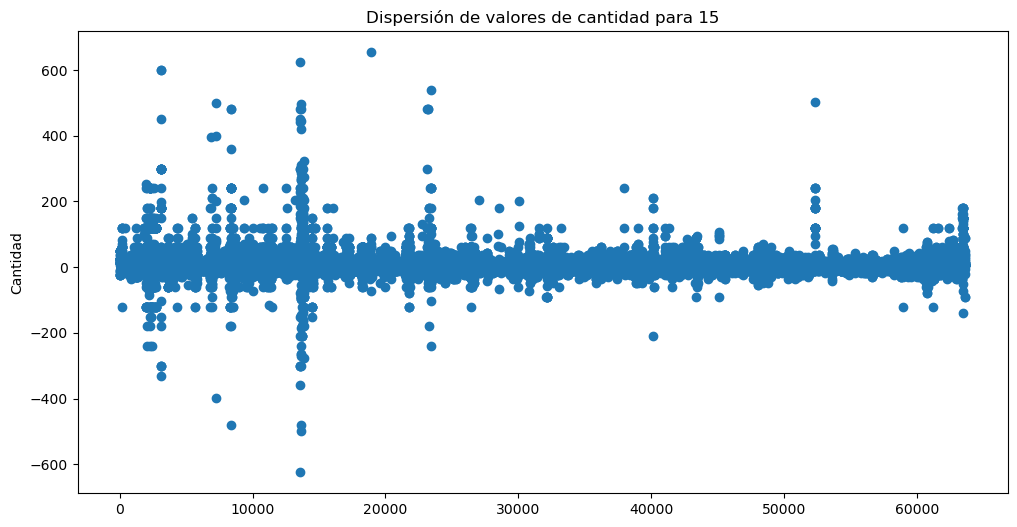

In [498]:
df_group_15 = df_filter[df_filter['codGrupoMaterial2'] == 15]

plt.figure(figsize=(12, 6))
plt.scatter(df_group_15.index, df_group_15['Cantidad'])

plt.ylabel('Cantidad')
plt.title('Dispersión de valores de cantidad para 15')
plt.show()

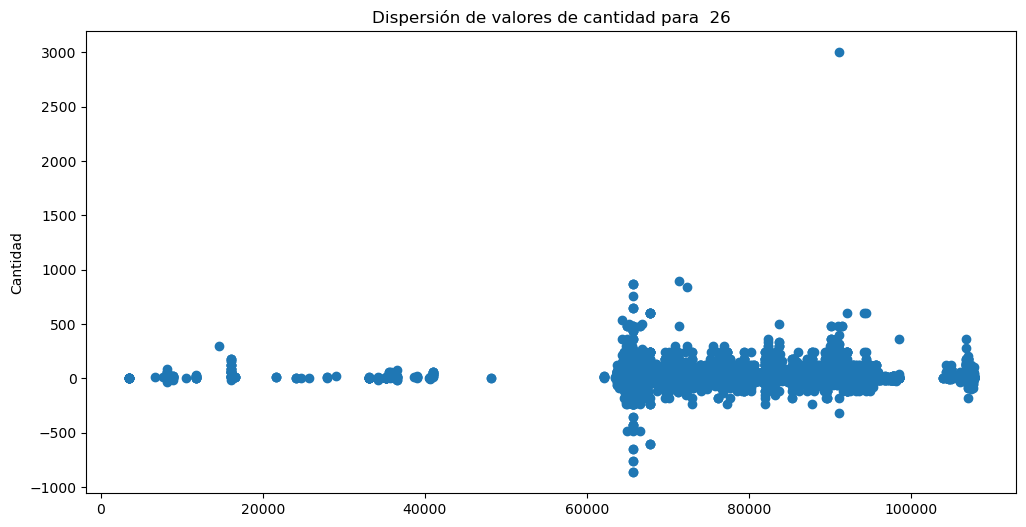

In [499]:
df_group_26 = df_filter[df_filter['codGrupoMaterial2'] == 26]

plt.figure(figsize=(12, 6))
plt.scatter(df_group_26.index, df_group_26['Cantidad'])

plt.ylabel('Cantidad')
plt.title('Dispersión de valores de cantidad para  26')
plt.show()

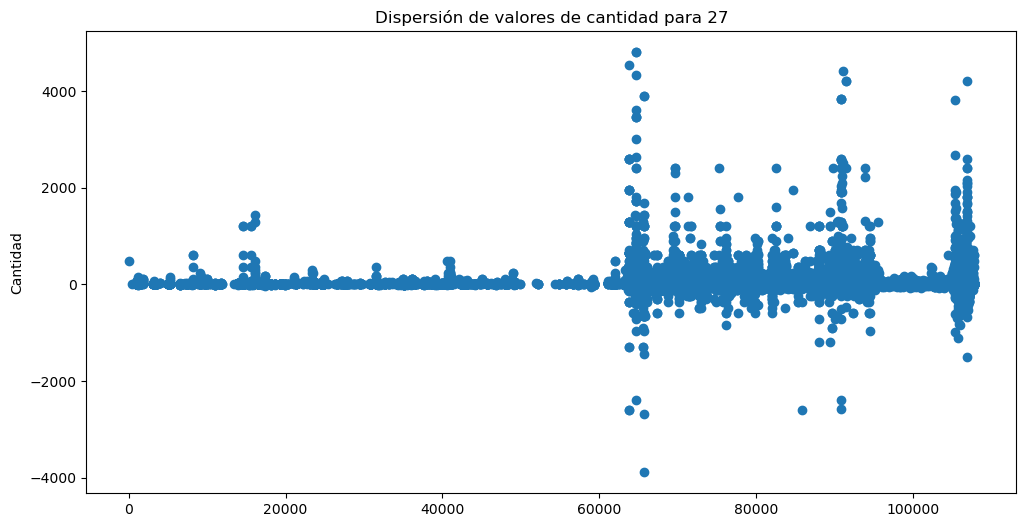

In [500]:
df_group_27 = df_filter[df_filter['codGrupoMaterial2'] == 27]

plt.figure(figsize=(12, 6))
plt.scatter(df_group_27.index, df_group_27['Cantidad'])

plt.ylabel('Cantidad')
plt.title('Dispersión de valores de cantidad para 27')
plt.show()

In [501]:
# Cambiamos el tipo de la columna, en una copia, para hacer mas facil la visualizacion.
df_cat = df_filter.copy()
df_cat['codGrupoMaterial2'] = df_cat['codGrupoMaterial2'].astype('str')

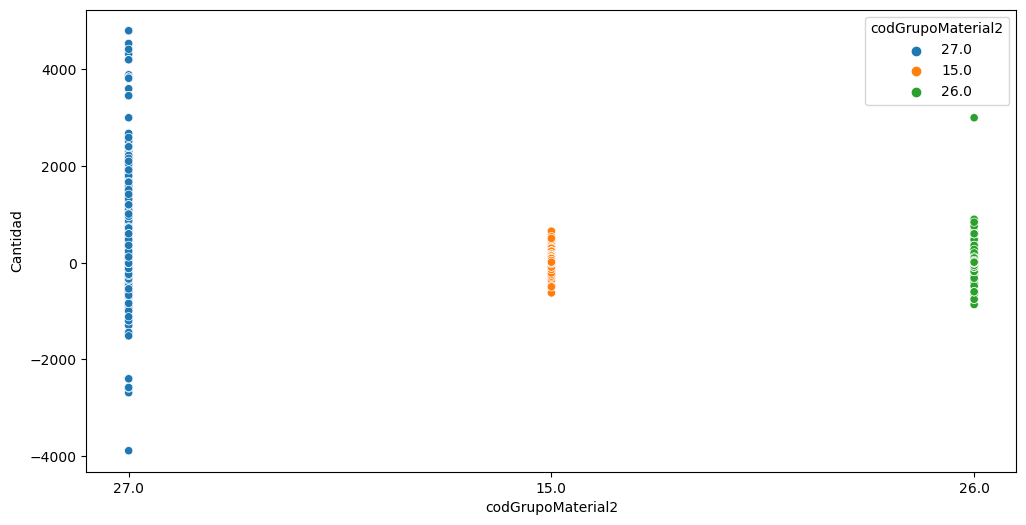

In [502]:
ax = sns.scatterplot(data=df_cat, x= 'codGrupoMaterial2', y ="Cantidad", hue="codGrupoMaterial2")
ax.figure.set_size_inches(12,6)

Tal como habiamos dicho, la demanda de productos del tipo 27, es mucho mas dispersa que la de las demas. Osea que a la hora de hacer una solicitud de cantidad de los productos que se encuentran en esa categoria, esta es la que mas se demanda, pero tambien es la que mas se devuelve.

11- Determine si hay outliers en cada una de las variables.



Para la variable Fecha, observemos el minimo y el maximo, para encontrar si estan o no, fuera de rango:

In [503]:
print(f'Fecha minima es {df_filter.Fecha.min()} y maxima es {df.Fecha.max()}')

Fecha minima es 2018-01-01 00:00:00 y maxima es 2021-11-01


no encontramos outliers entre las fechas de registro.

Ahora vamos a analizar cual es el comportamiento de la variable "Cantidad", y si es posible detectar valores atípicos o outliers. 

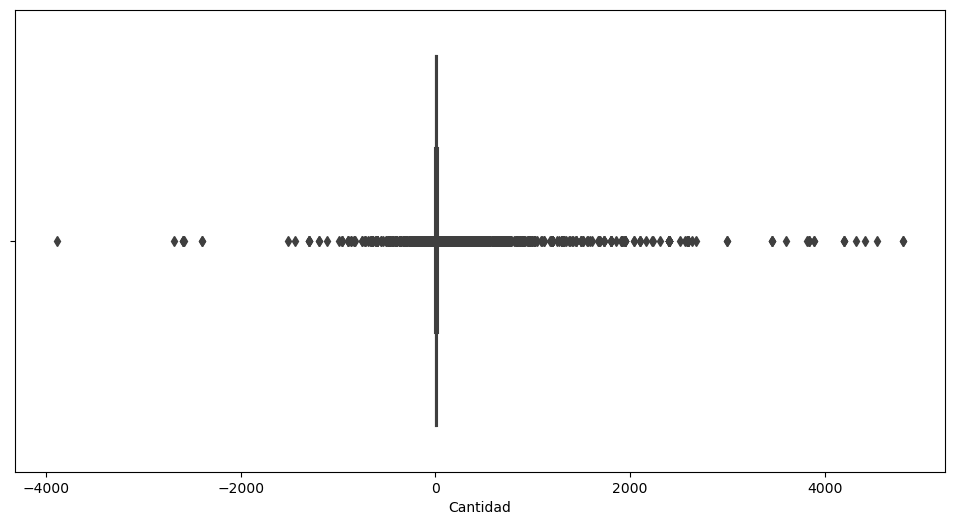

In [504]:
#Graficamos la dispersion de los valores para ver su distribucion. 
ax = sns.boxplot(df_filter,x='Cantidad')
ax.figure.set_size_inches(12,6)

Podemos empezar preguntandonos si es que los valores extremos corresponden a un mismo producto

In [505]:
df_material = df_filter.groupby('CodMaterial')['Cantidad'].describe().sort_values(by='max', ascending=False)
df_material

,count,mean,std,min,25%,50%,75%,max
CodMaterial,,,,,,,,
81074,8566.0,106.627131,338.571555,-3888.0,12.0,24.0,84.0,4800.0
80054,2566.0,26.992985,88.826940,-648.0,6.0,12.0,34.5,3000.0
81054,4368.0,58.385302,144.712911,-1296.0,12.0,24.0,60.0,2400.0
81024,2942.0,37.005099,102.776063,-672.0,12.0,12.0,36.0,1908.0
81044,645.0,33.306977,101.747276,-240.0,12.0,12.0,24.0,1368.0
...,...,...,...,...,...,...,...,...
7727,5.0,2.400000,4.098780,-4.0,2.0,2.0,6.0,6.0
7684,4.0,3.000000,6.000000,-6.0,3.0,6.0,6.0,6.0
7677,5.0,1.800000,2.863564,-3.0,2.0,2.0,4.0,4.0


Vemos que efectivamente la demanda y la devolucion corresponden de grandes cantidades, en general corresponden a un mismo producto. Esto puede reflejar una compra de un gran volumen, que luego no se utilizo y se devolvió lo sobrante. Esta situacion es posible, y por tanto no es razon para identificar outliers. 

Podemos preguntarnos si es que para un mismo producto hay una compra neta positiva, es decir, si es que hubo una compra y devolucion, no ingresaron al stock materiales que no estaban antes.

In [506]:
df_material['compra_efec'] = df_material['max'] + df_material['min']
df_material.sort_values(by='compra_efec')

,count,mean,std,min,25%,50%,75%,max,compra_efec
CodMaterial,,,,,,,,,
80167,2.0,0.000000,2.828427,-2.0,-1.0,0.0,1.0,2.0,0.0
80095,274.0,11.846715,35.931842,-216.0,6.0,12.0,18.0,216.0,0.0
7617,149.0,3.570470,8.888388,-24.0,-4.0,6.0,6.0,24.0,0.0
480442,6.0,0.000000,18.590320,-24.0,-12.0,0.0,12.0,24.0,0.0
7724,3523.0,2.860630,20.287209,-240.0,-6.0,6.0,6.0,240.0,0.0
...,...,...,...,...,...,...,...,...,...
81055,1413.0,30.326256,67.679980,-270.0,6.0,18.0,36.0,1200.0,930.0
81054,4368.0,58.385302,144.712911,-1296.0,12.0,24.0,60.0,2400.0,1104.0
81044,645.0,33.306977,101.747276,-240.0,12.0,12.0,24.0,1368.0,1128.0


Nuevamente vemos que no hay inconsistencias, ya que aun con devoluciones, hubo una compra efectiva, o la sumo, una devolucion total de lo comprado.

Podemos preguntarnos si es que estas compras y devoluciones corresponden a un mismo cliente, ya que seria raro que un cliente tenga una compra devolucion unicamente, sin haber hecho una compra previa. 

In [507]:
df_clientes = df_filter.groupby('CodCliente_of')['Cantidad'].describe().sort_values(by='max', ascending=False)
df_clientes

,count,mean,std,min,25%,50%,75%,max
CodCliente_of,,,,,,,,
1072,812.0,137.099754,478.835227,-2400.0,12.0,24.0,96.0,4800.0
1068,218.0,200.366972,695.491878,-2592.0,12.0,36.0,240.0,4536.0
1392,20.0,910.950000,1310.222138,-318.0,28.5,318.0,1500.0,4416.0
1400,92.0,236.445652,660.731619,-468.0,60.0,180.0,240.0,4200.0
1605,104.0,523.961538,753.464283,-18.0,120.0,180.0,432.0,4200.0
...,...,...,...,...,...,...,...,...
377,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
382,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1016,3.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Vemos que los clientes con altas demandas tiene asociados tambien sus respectivas devoluciones, pero hay que repetir el analisis anterior y corroborar que haya una compra efectiva no negativa.

In [508]:
df_clientes['compra_efec'] = df_clientes['max'] + df_clientes['min']
df_clientes.sort_values(by='compra_efec', ascending=False)

,count,mean,std,min,25%,50%,75%,max,compra_efec
CodCliente_of,,,,,,,,,
1605,104.0,523.961538,753.464283,-18.0,120.0,180.0,432.0,4200.0,4182.0
1392,20.0,910.950000,1310.222138,-318.0,28.5,318.0,1500.0,4416.0,4098.0
1400,92.0,236.445652,660.731619,-468.0,60.0,180.0,240.0,4200.0,3732.0
1072,812.0,137.099754,478.835227,-2400.0,12.0,24.0,96.0,4800.0,2400.0
1247,119.0,172.672269,348.345754,-60.0,36.0,60.0,120.0,2400.0,2340.0
...,...,...,...,...,...,...,...,...,...
664,1881.0,6.819777,11.352474,-78.0,2.0,6.0,12.0,78.0,0.0
687,274.0,4.244526,5.216421,-12.0,4.0,6.0,6.0,12.0,0.0
684,26.0,7.038462,4.870160,-12.0,6.0,6.0,12.0,12.0,0.0


Notamos un cliente que, sin compra previa registrada, tiene 2 devoluciones, lo que significaria un valor atipico. Para analizar mejor este caso, vamos a ver las caracteriesticas de estas transacciones.

In [509]:
df_filter[df_filter['CodCliente_of'] == 1011]

,Fecha,NroDocPedido,PosPedido,CodMaterial,Cantidad,GrupoArticulos,codGrupoMaterial2,codGrupoMaterial4,codGrupoMaterial5,Tipo_Precio,Departamento,Localidad,Provincia,Pais,CodCliente_of,CodSucCliente_of,Año,Mes
63179,2018-01-01,216187.0,40.0,7934,-6,Espesantes,15.0,137.0,288.0,1.0,COMUNA 01,COMUNA 1,Capital Federal,AR,1011,1277,2018,1
63180,2018-01-01,223538.0,20.0,7934,-6,Espesantes,15.0,137.0,288.0,1.0,COMUNA 01,COMUNA 1,Capital Federal,AR,1011,1277,2018,1


Vemos quue ambas devoluciones fueron hechas el 01-01-2018, fecha limite de nuestro set de datos, por lo que podemos inferir que corresponden a compras previas a los registros que tenemos. Por estas razones, podemos concluir que hay inconsistencias entre las cantidades demandadas, y por lo tanto no hay valores atipicos que eliminiar.

### Veamos los numeros de documento:

<Axes: xlabel='NroDocPedido'>

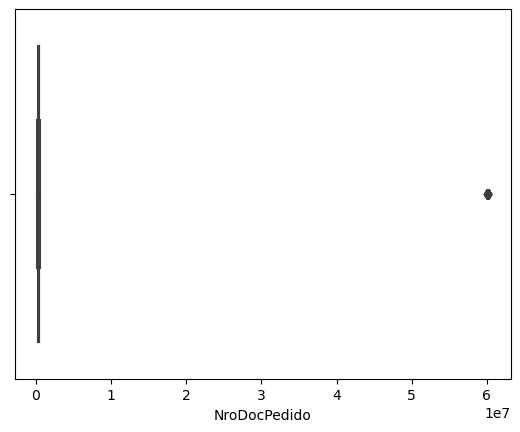

In [510]:
sns.boxplot(df_filter, x='NroDocPedido')

In [511]:
df_filter.NroDocPedido.describe().apply("{0:.2f}".format)

count      107789.00
mean       408364.96
std       1535023.26
min        184502.00
25%        299478.00
50%        370867.00
75%        434574.00
max      60185491.00
Name: NroDocPedido, dtype: object

Vemos que los numeros de documentos tienen outliers, pero al ser numeros de identificacion de transacciones, no hay nada que se pueda decir respecto de ellos, ya que no conocemos la metodologia de registros.

Valores categoricos:

In [512]:
num_dept = df_filter.groupby('Provincia')['Departamento'].nunique().sum()
print(f'El dataset tiene {num_dept} cantidad de departamentos, y existen en la Argentina, 380')

El dataset tiene 346 cantidad de departamentos, y existen en la Argentina, 380


In [513]:
df_filter.groupby('Provincia')['Departamento'].nunique()

Provincia
Buenos Aires           112
Capital Federal         18
Catamarca                7
Central                  1
Chaco                   14
Chubut                   5
Corrientes              21
Córdoba                 22
Entre Rios              14
Formosa                  4
Jujuy                    5
La Pampa                11
La Rioja                 5
Mendoza                 16
Misiones                13
Montevideo               1
Neuquen                  6
Rio Negro                5
Salta                    9
San Juan                 5
San Luis                 5
Santa Cruz               6
Santa Fé                19
Santiago del Estero     12
Tierra del Fuego         2
Tucumán                  8
Name: Departamento, dtype: int64

En base al link de abajo, no tenemos outliers en los departametoshttps:
//es.wikipedia.org/wiki/Anexo:Divisiones_territoriales_de_segundo_orden_de_Argentina#:~:text=A%20septiembre%20de%202020%20existen,15%20comunas

In [514]:
prov_per_country = df_filter.groupby('Pais')['Provincia'].nunique()
prov_per_country

Pais
AR    24
PY     1
UY     1
Name: Provincia, dtype: int64

No tenemos provincias de mas en ningun pais

12- Determinar si hay valores faltantes en cada una de las variables. 



In [515]:
variables = ['NroDocPedido', 'PosPedido', 'CodMaterial', 'Cantidad', 'CodGrupoArt', 'GrupoArticulos',
             'codGrupoMaterial2', 'codGrupoMaterial4', 'codGrupoMaterial5', 'Tipo_Precio',
             'Departamento', 'Localidad', 'Provincia', 'Pais', 'CodCliente_of', 'CodSucCliente_of']

for variable in variables:
    nulos = df[variable].isnull().sum()
    print("Valores faltantes en", variable, ":", nulos)

Valores faltantes en NroDocPedido : 0
Valores faltantes en PosPedido : 0
Valores faltantes en CodMaterial : 0
Valores faltantes en Cantidad : 0
Valores faltantes en CodGrupoArt : 0
Valores faltantes en GrupoArticulos : 0
Valores faltantes en codGrupoMaterial2 : 0
Valores faltantes en codGrupoMaterial4 : 0
Valores faltantes en codGrupoMaterial5 : 0
Valores faltantes en Tipo_Precio : 0
Valores faltantes en Departamento : 0
Valores faltantes en Localidad : 0
Valores faltantes en Provincia : 0
Valores faltantes en Pais : 0
Valores faltantes en CodCliente_of : 0
Valores faltantes en CodSucCliente_of : 0


13- Calcule la media y la mediana de la cantidad de materiales vendidos por mes. 



In [516]:
# Agrupar los datos por mes y calcular la media y la mediana de la cantidad de materiales vendidos
tabla_por_mes = df_filter.groupby('Mes')['Cantidad'].agg(['sum','min', 'max','mean', 'median']).reset_index()
tabla_por_mes.columns = ['Mes', 'Cantidad Total','min', 'max', 'Media', 'Mediana']

tabla_por_mes


,Mes,Cantidad Total,min,max,Media,Mediana
0,1,139090,-1116,3840,17.626410,6.0
1,2,189069,-600,3816,22.984318,6.0
2,3,178576,-240,3456,22.879693,6.0
3,4,154977,-2592,2592,17.788912,6.0
4,5,143469,-2592,2592,17.214903,6.0
5,6,185954,-900,4800,22.163766,6.0
6,7,194603,-2400,3840,20.782038,10.0
7,8,299408,-840,4800,27.450995,12.0
8,9,270511,-960,4536,27.354738,12.0
9,10,286450,-3888,3888,25.313715,12.0


In [517]:
# Agrupamos cada media y mediana por mes y año:
grouped_quantity = df_filter.groupby(['Mes', 'Año']).agg(Cantidad_mean=('Cantidad', 'mean'),
                                 Cantidad_median = ('Cantidad', 'median'))
# Reiniciamos los indeces, para poder obeter Month y Year como columnas
grouped_quantity.reset_index(inplace=True)

In [518]:
# Reemplazamos los valores del mes, por su nombre para mejor visualizacion
grouped_quantity.Mes.replace(month_dict, inplace=True)

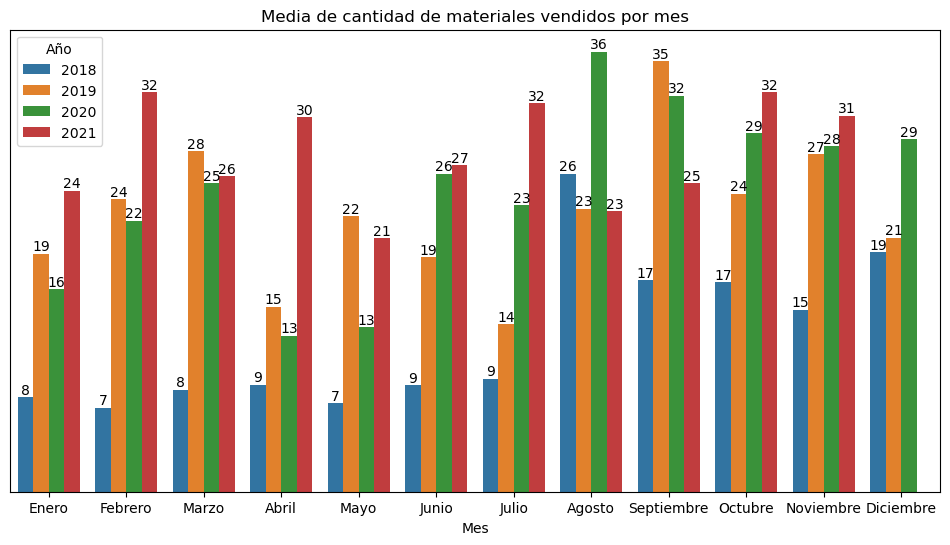

In [519]:
ax = sns.barplot(grouped_quantity, x='Mes', y='Cantidad_mean', hue = 'Año')
format_plot(ax, 'Media de cantidad de materiales vendidos por mes')

En general vemos que el año que mas se vendio fue en 2021. Si bien solo en 2 meses se ve una diferencia importante de medias entre los años, podemos concluir que el 2021 fue el mejor

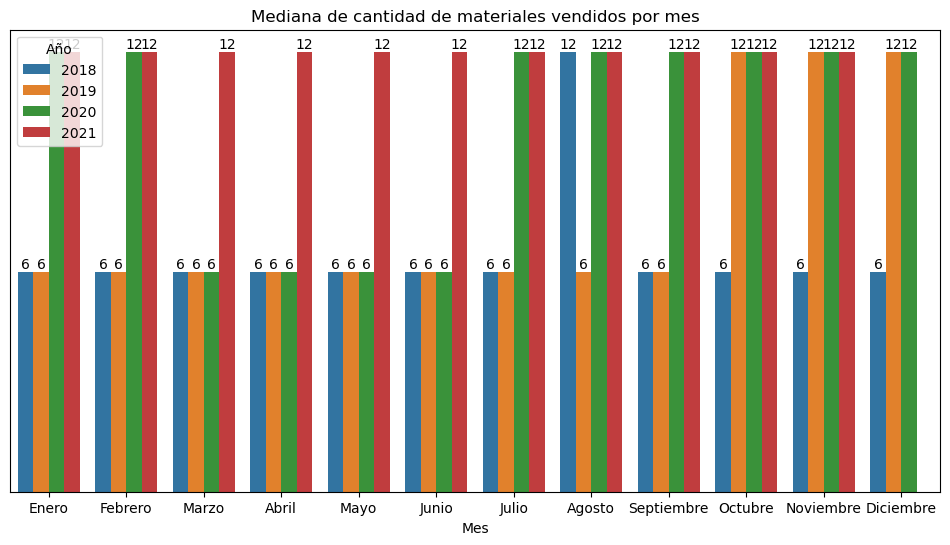

In [520]:
ax = sns.barplot(grouped_quantity, x='Mes', y='Cantidad_median', hue = 'Año')
format_plot(ax, 'Mediana de cantidad de materiales vendidos por mes')

14- ¿Cuál es la frecuencia de las variables categóricas?   CAMBIAR


In [521]:
codMa_count = df_filter.CodMaterial.value_counts().to_frame().reset_index()
codMa_count.rename(columns = {'index':'CodMaterial', 'CodMaterial':'Cantidad'})

,CodMaterial,Cantidad
0,7604,13818
1,7605,9423
2,81074,8566
3,8051,5996
4,81054,4368
...,...,...
173,7799,2
174,80167,2
175,470355,1
176,480682,1


El material mas vendido es el 7604. Esto no implica que sea el de mayor cantidad vendida.

Vemos como es la frecuencia segun la variablee "GrupoArticulos":

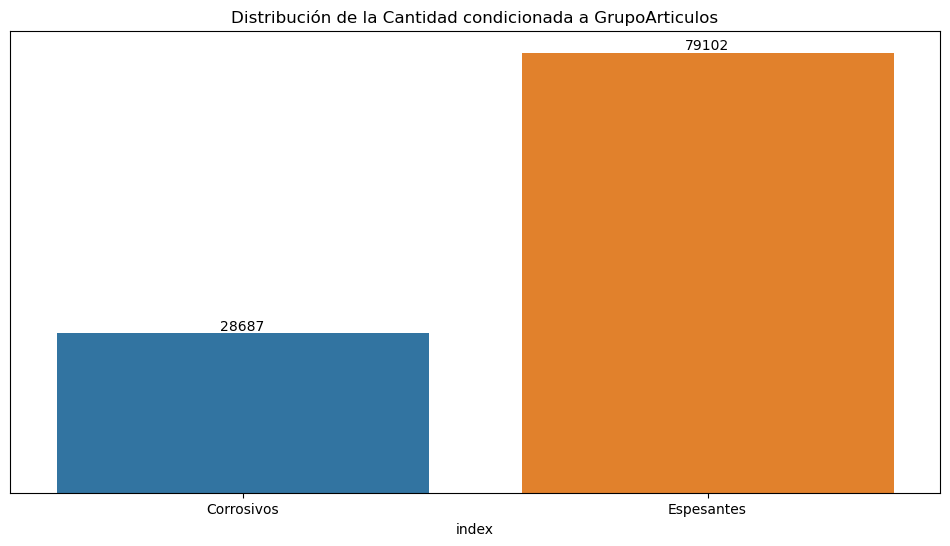

In [522]:
df_arti = df_filter.GrupoArticulos.value_counts().to_frame().reset_index()

ax = sns.barplot(data=df_arti, x='index', y='GrupoArticulos', errorbar=None)
format_plot(ax, 'Distribución de la Cantidad condicionada a GrupoArticulos')

Nuevamente vale aclarar que la frecuencia no significa compra efectiva, sino un conteo de aparicion en el set de datos.

Vemos las frecuencias para cada grupo de materiales del tipo 2,4 y 5.

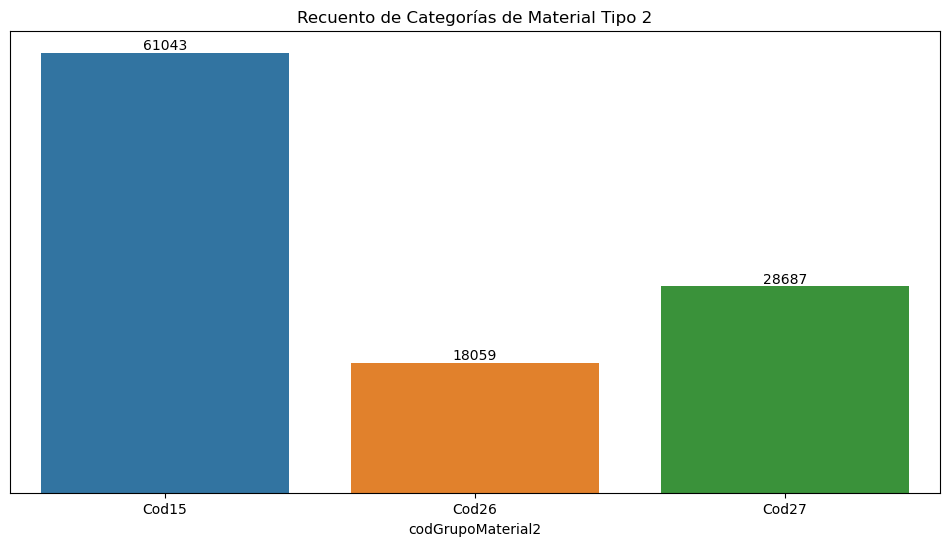

In [523]:
conteo_categorias = df['codGrupoMaterial2'].value_counts().to_frame().reset_index()
conteo_categorias.rename(columns={'index':'codGrupoMaterial2', 'codGrupoMaterial2':'Cantidad'}, inplace=True)
ax = sns.barplot(conteo_categorias, x='codGrupoMaterial2', y='Cantidad')
format_plot(ax, 'Recuento de Categorías de Material Tipo 2')

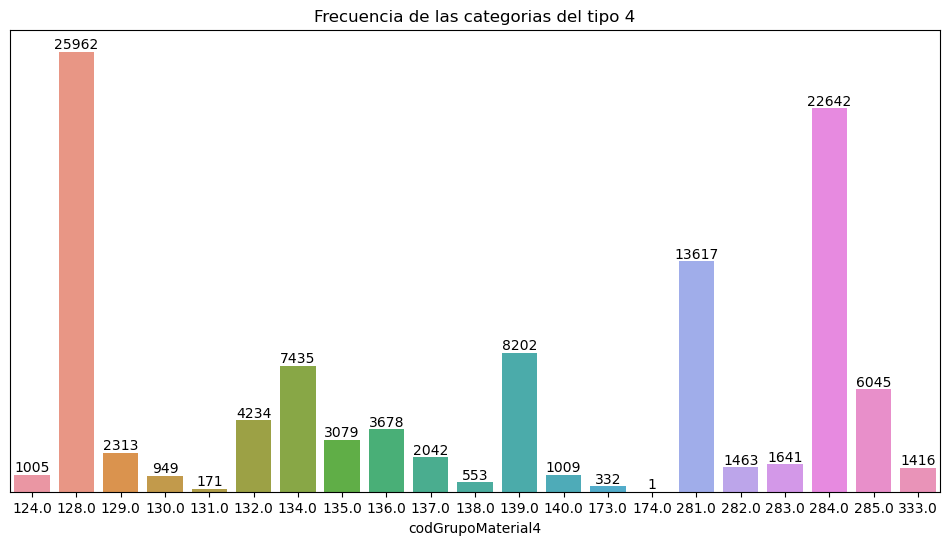

In [524]:
codgm4_count = df_filter.codGrupoMaterial4.value_counts().to_frame().reset_index()
codgm4_count.rename(columns = {'index':'codGrupoMaterial4', 'codGrupoMaterial4':'Cantidad'}, inplace=True)
ax = sns.barplot(codgm4_count, x='codGrupoMaterial4', y='Cantidad')
format_plot(ax, 'Frecuencia de las categorias del tipo 4')

#### Las categorias mas vendidas son la 128, 281 y 284

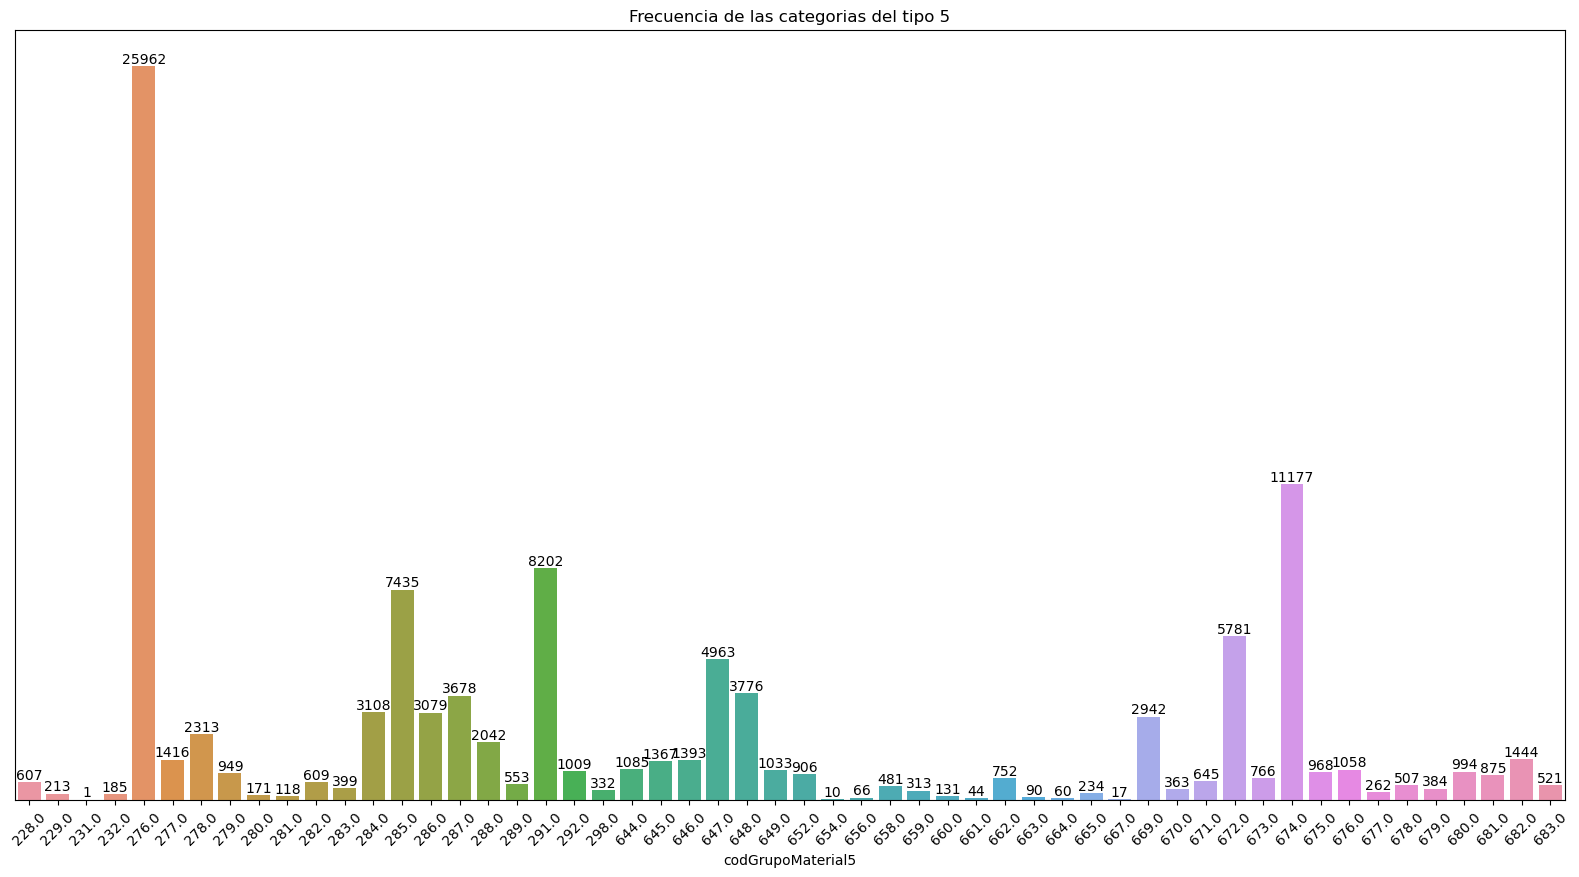

In [525]:
codgm5_count = df_filter.codGrupoMaterial5.value_counts().to_frame().reset_index()
codgm5_count.rename(columns = {'index':'codGrupoMaterial5', 'codGrupoMaterial5':'Cantidad'}, inplace=True)
ax = sns.barplot(codgm5_count, x='codGrupoMaterial5', y='Cantidad')
format_plot(ax, 'Frecuencia de las categorias del tipo 5')
plt.xticks(rotation=45)
ax.figure.set_size_inches(20,10)

#### Las categorias mas vendidas son la 276, 291 y 674

Vemos cuales son los departamentos mas frecuentes.

In [526]:
dept_count = df_filter.Departamento.value_counts().to_frame().reset_index()
dept_count.rename(columns = {'index':'Departamento', 'Departamento':'Cantidad'}, inplace=True)
dept_count.head(5)

,Departamento,Cantidad
0,CAPITAL,10356
1,ROSARIO,7793
2,LA MATANZA,3078
3,GENERAL SAN MARTIN,2983
4,COLON,2530


La mayoria de las ventas se dan en el departamento Capital

In [527]:
country_count = df_filter.Pais.value_counts().to_frame().reset_index()
country_count.rename(columns = {'index':'Pais', 'Pais':'Cantidad'}, inplace=True)
country_count

,Pais,Cantidad
0,AR,107427
1,UY,319
2,PY,43


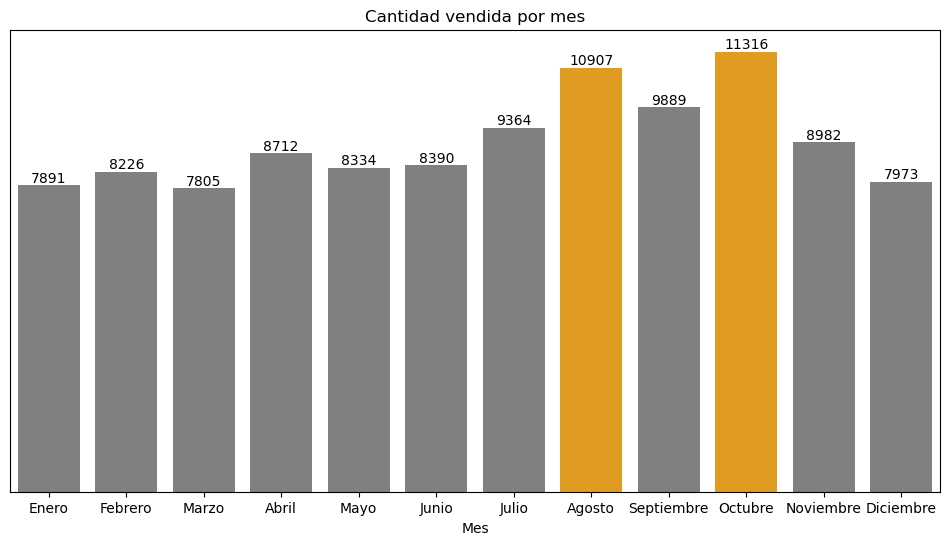

In [528]:
month_count = df_filter.Mes.value_counts().to_frame().reset_index()
month_count.rename(columns = {'index':'Mes', 'Mes':'Cantidad'}, inplace=True)
# Reemplazamos los valores del mes, por su nombre para mejor visualizacion
month_count.sort_values(by='Mes', inplace=True)
month_count.Mes.replace(month_dict, inplace=True)
cols = ['grey' if (x < 10907) else 'orange' for x in month_count.Cantidad]
ax = sns.barplot(month_count, x='Mes', y='Cantidad', palette = cols)
format_plot(ax, 'Cantidad de ventas por mes')


15- ¿Cómo es la distribución de la variable target condicionada a otras 3 variables que decida seleccionar?



Vemos los valores de la variable Cantidad

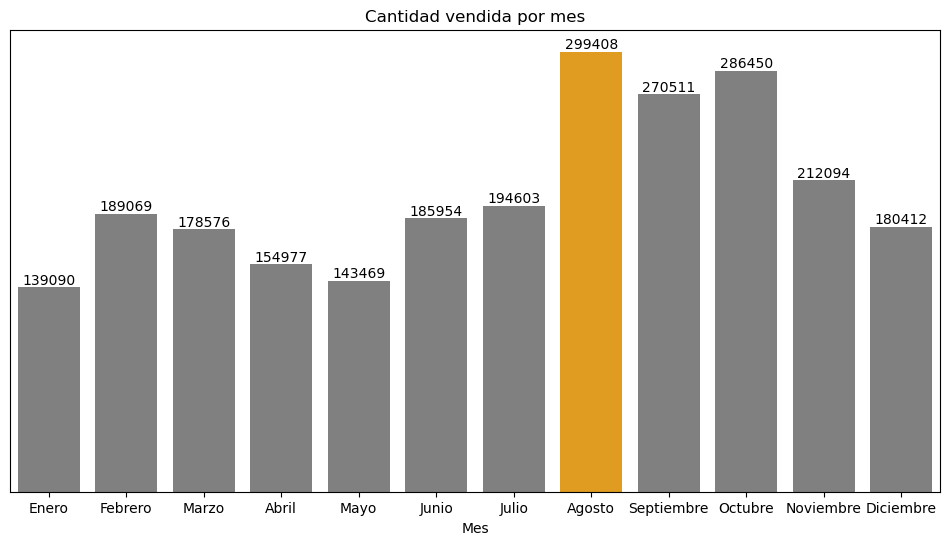

In [529]:
df_grouped = df_filter.groupby('Mes')['Cantidad'].sum().reset_index()
df_grouped.Mes.replace(month_dict, inplace=True)
cols = ['grey' if (x < 299408) else 'orange' for x in df_grouped.Cantidad]
ax = sns.barplot(df_grouped, x='Mes', y='Cantidad', palette = cols)
format_plot(ax, 'Cantidad vendida por mes')

Vemos la Variable Provincia

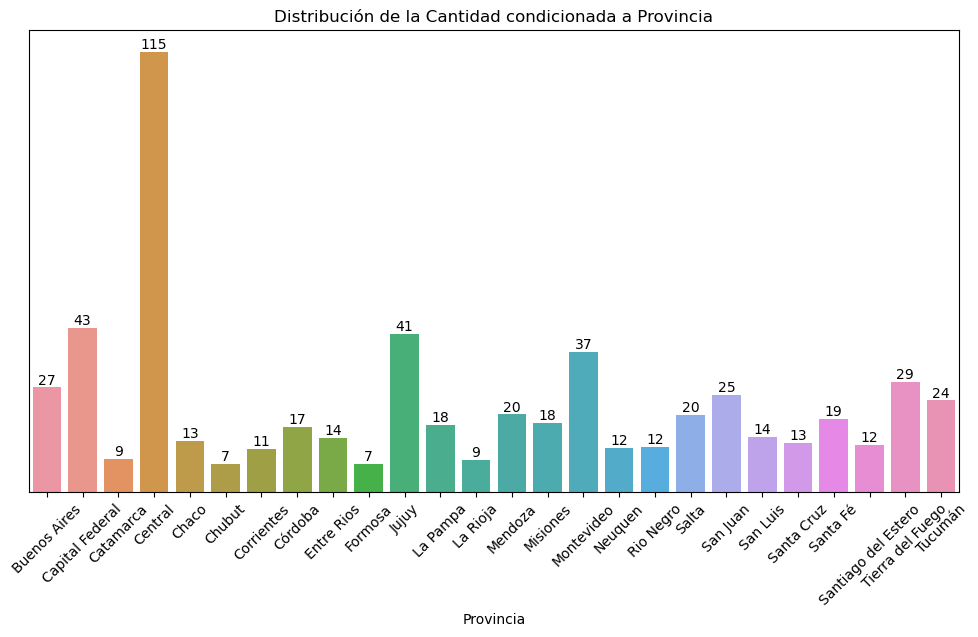

In [530]:
ax = sns.barplot(data=df_filter, x='Provincia', y='Cantidad', errorbar = None)
format_plot(ax, 'Distribución de la Cantidad condicionada a Provincia')
plt.xticks(rotation=45)
plt.show()

Vemos los valores unicos de las variables y las cambiamos a categoricas

In [531]:
valores_unicos_codGrupoMaterial4 = df_filter['codGrupoMaterial4'].unique()
valores_unicos_Tipo_Precio = df_filter['Tipo_Precio'].unique()

In [532]:
valores_unicos_codGrupoMaterial4 

array([284., 139., 128., 134., 135., 129., 136., 132., 140., 138., 131.,
       333., 137., 130., 285., 281., 173., 124., 282., 283., 174.])

In [533]:
valores_unicos_Tipo_Precio

[10.0, 1.0, 9.0]
Categories (3, float64): [1.0, 9.0, 10.0]

In [534]:
tipo_codGrupoMaterial4 = df_filter['codGrupoMaterial4'].dtype
tipo_Tipo_Precio = df_filter['Tipo_Precio'].dtype

print("Tipo de variable para codGrupoMaterial4:", tipo_codGrupoMaterial4)
print("Tipo de variable para Tipo_Precio:", tipo_Tipo_Precio)

Tipo de variable para codGrupoMaterial4: float64
Tipo de variable para Tipo_Precio: category


In [535]:
df_filter['codGrupoMaterial4'] = df_filter['codGrupoMaterial4'].astype('category')

Vemos la Variable codGrupoMaterial4

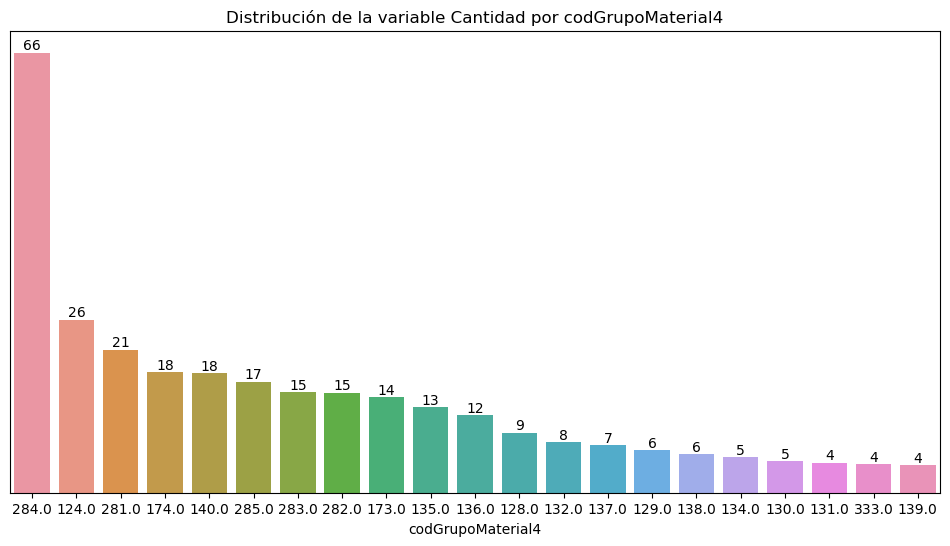

In [536]:
# Agrupamos los datos por codGrupoMaterial4 y calcular la media de la variable Cantidad
grupo_cantidad = df_filter.groupby('codGrupoMaterial4')['Cantidad'].mean().to_frame().reset_index()

# Creamos el gráfico de barras y Ordenamos los grupos por la media de Cantidad de forma descendente
ax = sns.barplot(grupo_cantidad, x='codGrupoMaterial4', y='Cantidad',
                 order = grupo_cantidad.sort_values(by='Cantidad', ascending=False)['codGrupoMaterial4'])
format_plot(ax,'Distribución de la variable Cantidad por codGrupoMaterial4')


Vemos la Variable Tipo_Precio

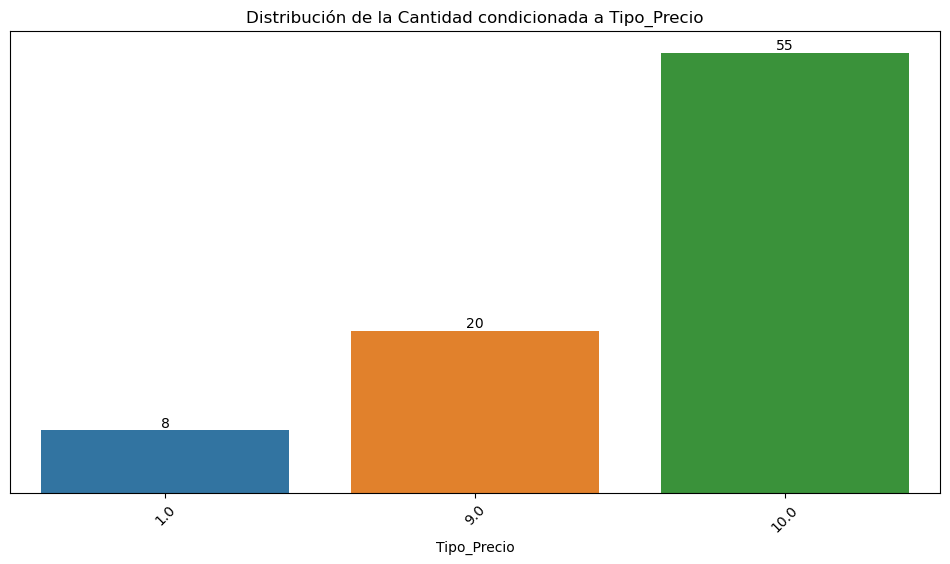

In [537]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filter, x='Tipo_Precio', y='Cantidad', errorbar = None)
format_plot(ax, 'Distribución de la Cantidad condicionada a Tipo_Precio')
plt.xticks(rotation=45)
plt.show()

16- Indicar cuáles son las variables que tienen mayor correlación.



In [538]:
correlacion = df_filter.corr()

In [539]:
correlacion_absoluta = correlacion.abs()
correlacion_ordenada = correlacion_absoluta.unstack().sort_values(ascending=False)

In [540]:
umbral = 0.8  # Umbral de correlación a considerar
correlacion_filtrada = correlacion_ordenada[(correlacion_ordenada != 1) & (correlacion_ordenada > umbral)]

In [541]:
variables_mayor_correlacion = correlacion_filtrada.reset_index().rename(columns={0: 'Correlacion'})
variables_mayor_correlacion


,level_0,level_1,Correlacion
0,CodSucCliente_of,CodCliente_of,0.990722
1,CodCliente_of,CodSucCliente_of,0.990722
2,codGrupoMaterial5,codGrupoMaterial2,0.972466
3,codGrupoMaterial2,codGrupoMaterial5,0.972466
4,CodCliente_of,codGrupoMaterial2,0.827503
5,codGrupoMaterial2,CodCliente_of,0.827503
6,CodSucCliente_of,codGrupoMaterial2,0.825584
7,codGrupoMaterial2,CodSucCliente_of,0.825584
8,codGrupoMaterial5,CodCliente_of,0.801824
9,CodCliente_of,codGrupoMaterial5,0.801824


Text(0.5, 1.0, 'Matriz Correlacion')

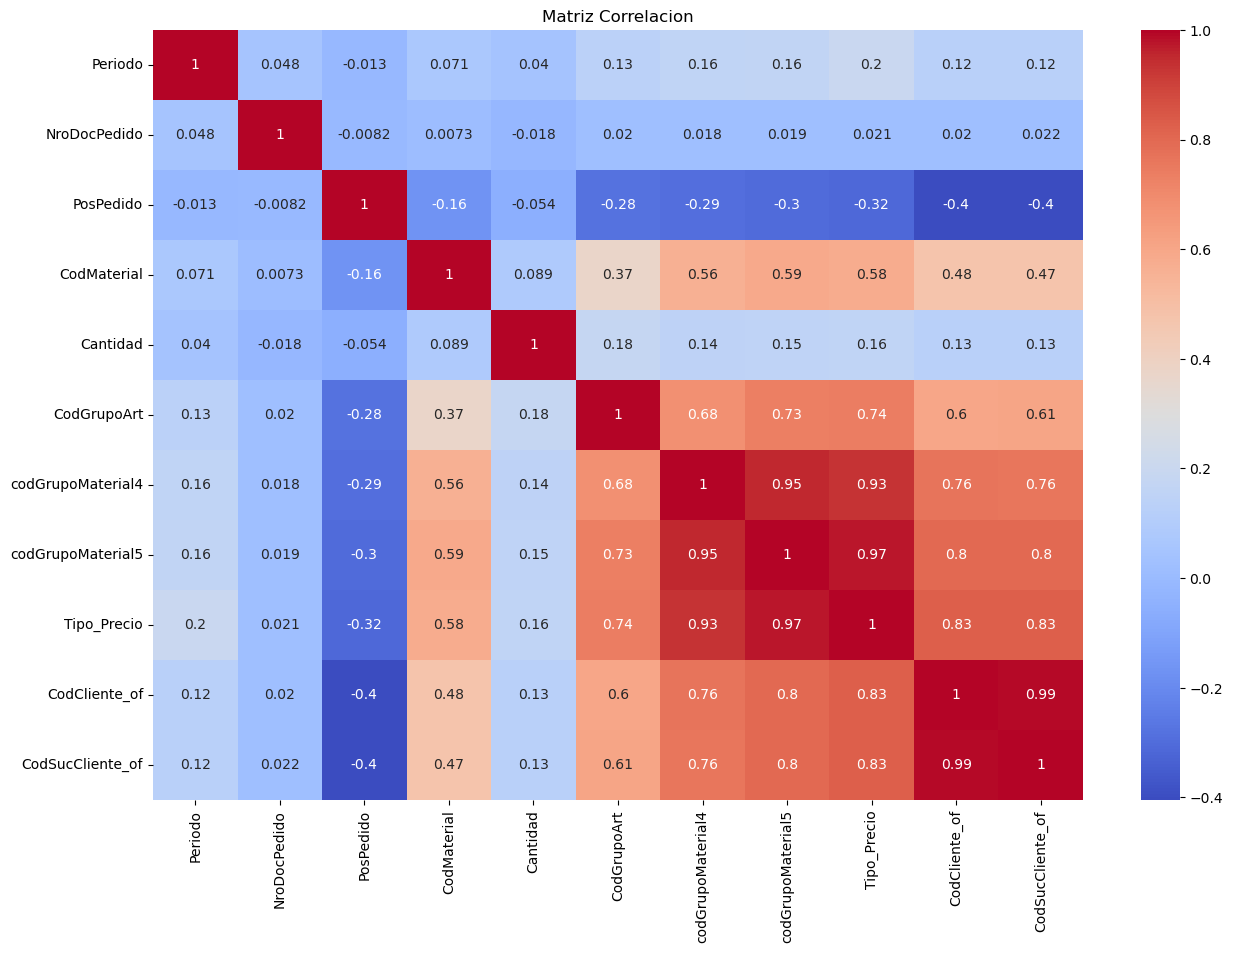

In [542]:
numerical_val = ['Periodo', 'Fecha', 'NroDocPedido', 'PosPedido', 'CodMaterial',
                 'Cantidad', 'CodGrupoArt', 'GrupoArticulos', 'codGrupoMaterial2', 'codGrupoMaterial4',
                 'codGrupoMaterial5', 'Tipo_Precio', 'CodCliente_of', 'CodSucCliente_of']

# Calculamos la matriz de correlación
corr_matrix = df[numerical_val].corr();
# Creamos el heatmap
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
ax.figure.set_size_inches(15,10)
ax.set_title('Matriz Correlacion')

Vemos que efectivamente las varaibles de mayor correlacion son el identificador de cliente y el identificador de la sucursal. Esto es obvio, ya que un cliente suele comprar en la sucursal de la localidad donde reside.  Tambien las variables grupo material 4,5 y tipo de precio tienen una alta correlacion.

17- Establecer la probabilidad conjunta de que un pedido corresponda a Espesantes y sea para la localidad de Córdoba.



In [543]:
df_cordoba = df_filter[df_filter['Localidad'] == 'CORDOBA']
df_cordoba

,Fecha,NroDocPedido,PosPedido,CodMaterial,Cantidad,GrupoArticulos,codGrupoMaterial2,codGrupoMaterial4,codGrupoMaterial5,Tipo_Precio,Departamento,Localidad,Provincia,Pais,CodCliente_of,CodSucCliente_of,Año,Mes
189,2018-03-01,239687.0,10.0,8055,12,Espesantes,15.0,139.0,291.0,1.0,CAPITAL,CORDOBA,Córdoba,AR,5,5,2018,3
190,2018-01-01,228602.0,10.0,408075,24,Espesantes,15.0,140.0,292.0,1.0,CAPITAL,CORDOBA,Córdoba,AR,5,5,2018,1
191,2018-09-01,270924.0,10.0,408075,60,Espesantes,15.0,140.0,292.0,1.0,CAPITAL,CORDOBA,Córdoba,AR,5,5,2018,9
192,2018-03-01,238616.0,30.0,408065,24,Espesantes,15.0,140.0,292.0,1.0,CAPITAL,CORDOBA,Córdoba,AR,5,5,2018,3
193,2018-03-01,238681.0,10.0,408065,48,Espesantes,15.0,140.0,292.0,1.0,CAPITAL,CORDOBA,Córdoba,AR,5,5,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107692,2020-07-01,408411.0,10.0,81074,96,Corrosivos,27.0,284.0,674.0,10.0,CAPITAL,CORDOBA,Córdoba,AR,1652,2216,2020,7
107693,2020-12-01,446492.0,10.0,81074,60,Corrosivos,27.0,284.0,674.0,10.0,CAPITAL,CORDOBA,Córdoba,AR,1652,2216,2020,12
107694,2021-07-01,484563.0,10.0,81074,96,Corrosivos,27.0,284.0,674.0,10.0,CAPITAL,CORDOBA,Córdoba,AR,1652,2216,2021,7
107695,2021-07-01,487640.0,10.0,81074,96,Corrosivos,27.0,284.0,674.0,10.0,CAPITAL,CORDOBA,Córdoba,AR,1652,2216,2021,7


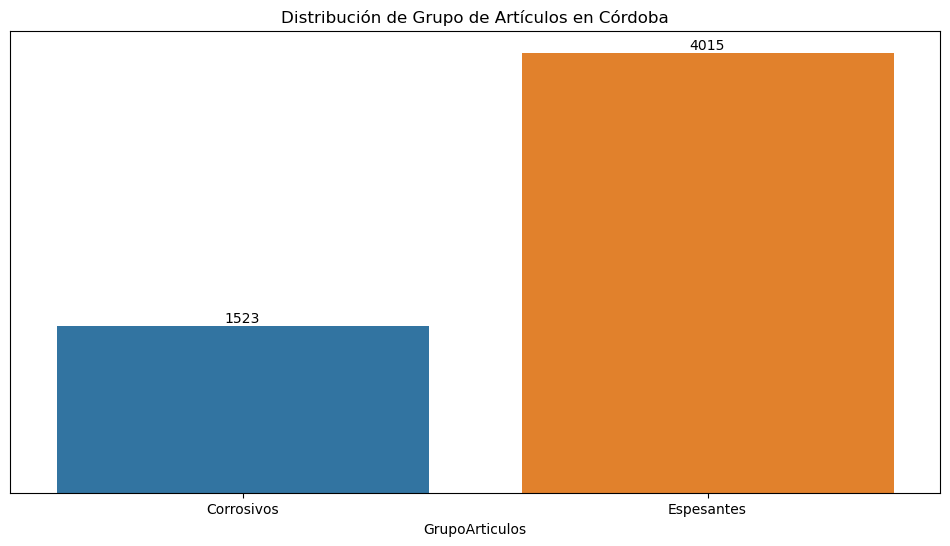

In [544]:
grupoarticulos_counts = df_cordoba['GrupoArticulos'].value_counts().to_frame().reset_index()
grupoarticulos_counts.rename(columns = {'index':'GrupoArticulos', 'GrupoArticulos':'Cantidad'}, inplace=True)

ax = sns.barplot(grupoarticulos_counts, x='GrupoArticulos', y='Cantidad')

format_plot(ax,'Distribución de Grupo de Artículos en Córdoba')

In [545]:
# Contar el número de registros con localidad "CORDOBA"
cantidad_cordoba = len(df_cordoba)

# Calcular la probabilidad dividiendo la cantidad de registros en "CORDOBA" entre el total de registros
probabilidad_cordoba = cantidad_cordoba / len(df_filter)
probabilidad_cordoba

0.05137815547040978

In [546]:
# Contar el número de pedidos de la categoría "Espesantes"
cantidad_espesantes = len(df_filter[df_filter['GrupoArticulos'] == 'Espesantes'])

# Calcular la probabilidad dividiendo la cantidad de pedidos "Espesantes" entre el total de pedidos
probabilidad_espesantes = cantidad_espesantes / len(df_filter)
probabilidad_espesantes

0.7338596702817541

Al ser dos eventos independiente, ya que un producto puede ser espesante o no sin importar la localidad en la que se venda, se puede calcular la probabilidad con la regla del producto.

In [547]:
#Calculamos la probabilidad
probabilidad_conjunta = probabilidad_espesantes * probabilidad_cordoba
probabilidad_conjunta

0.03770435623319963

OPCIONAL: ¿Qué productos tienen una demanda estable a la largo del año y cuales tienen una demanda estacional? Tome solo los 5 productos más solicitados

### Primero veamos algunas definiciones

- La estacionalidad se refiere a un patrón o variación cíclica que ocurre en un conjunto de datos a lo largo del tiempo. En el contexto de la demanda de productos, la estacionalidad se refiere a fluctuaciones predecibles y repetitivas en la demanda de un producto que se repiten en intervalos regulares, como estaciones del año, meses, semanas o días.

    La estacionalidad puede manifestarse como aumentos o disminuciones en la demanda en momentos específicos del año, temporadas de ventas, períodos de clima específico u otros eventos recurrentes. Estos patrones estacionales pueden influir en la planificación y gestión de inventario, producción, promociones y otras decisiones comerciales.

    Identificar la estacionalidad en los datos de demanda es importante para comprender y predecir los patrones de demanda futuros, permitiendo a las empresas ajustar sus operaciones y estrategias en consecuencia. Esto se puede lograr mediante técnicas de análisis de series de tiempo, como descomposición estacional, modelos de suavizado exponencial o modelos ARIMA, que ayudan a identificar y modelar los componentes estacionales en los datos de demanda.

- La demanda estable se refiere a una situación en la cual la demanda de un producto o servicio se mantiene relativamente constante a lo largo del tiempo, sin experimentar fluctuaciones significativas o patrones estacionales pronunciados. En otras palabras, la demanda estable implica que la cantidad requerida de un producto o servicio no varía de manera significativa en diferentes períodos de tiempo, ya sea a corto plazo o a largo plazo.

    En un entorno de demanda estable, las empresas pueden predecir y planificar de manera más precisa la cantidad de productos o servicios que deben producir o proporcionar. Esto les permite administrar mejor sus operaciones, controlar los niveles de inventario y ajustar la capacidad de producción de acuerdo con la demanda constante.

Anlizamos en primer momento los 5 productos mas vendidos, si presentan algun patron de estacionalidad o estable en el tiempo. Vamos a hacer un analisis grafico, sin meternos en modelos ARIMA que ayudan a mejorar las determianacion estas cuestiones temporales de los productos.

In [572]:
# En primera medida, tomamos los 5 productos más solicitados a la empresa
top_5_productos = df_filter['CodMaterial'].value_counts().nlargest(5).index.tolist()


In [574]:
#Vemos algunas medidas estadisticas que nos permiten dar una idea de la variablidid que tiene estos productos.
# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre los 5 productos más vendidos
for codigo in top_5_productos:
    # Filtrar los datos por el código de material actual
    df_codigo = df_filter[df_filter['CodMaterial'] == codigo]

    # Calcular la media, desviación estándar, valor máximo, valor mínimo, cantidad total y varianza de la cantidad
    cantidad_total = df_codigo['Cantidad'].sum()
    media = df_codigo['Cantidad'].mean()
    varianza = df_codigo['Cantidad'].var()
    desviacion_estandar = df_codigo['Cantidad'].std()
    valor_maximo = df_codigo['Cantidad'].max()
    valor_minimo = df_codigo['Cantidad'].min()

    resultados.append({
        'Código de Material': codigo,
        'Cantidad Total': cantidad_total,
        'Media': media,
        'Varianza': varianza,
        'Desviación Estándar': desviacion_estandar,
        'Valor Máximo': valor_maximo,
        'Valor Mínimo': valor_minimo
    })

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('Cantidad Total', ascending=False)
df_resultados


,Código de Material,Cantidad Total,Media,Varianza,Desviación Estándar,Valor Máximo,Valor Mínimo
2,81074,913368,106.627131,114630.698080,338.571555,4800,-3888
4,81054,255027,58.385302,20941.826548,144.712911,2400,-1296
0,7604,137497,9.950572,791.229155,28.128796,624,-624
1,7605,80400,8.532315,490.599226,22.149475,480,-300
3,8051,24755,4.128586,210.648184,14.513724,240,-180


Podemos ver que no tienen una DS muy elevada, lo mismo para la media. 

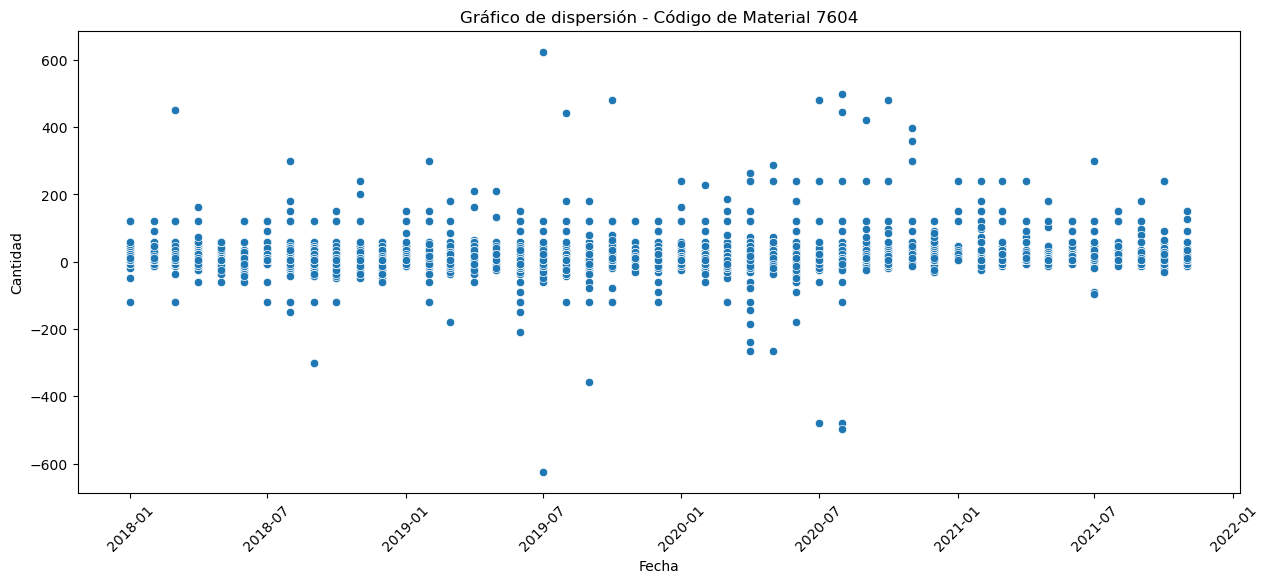

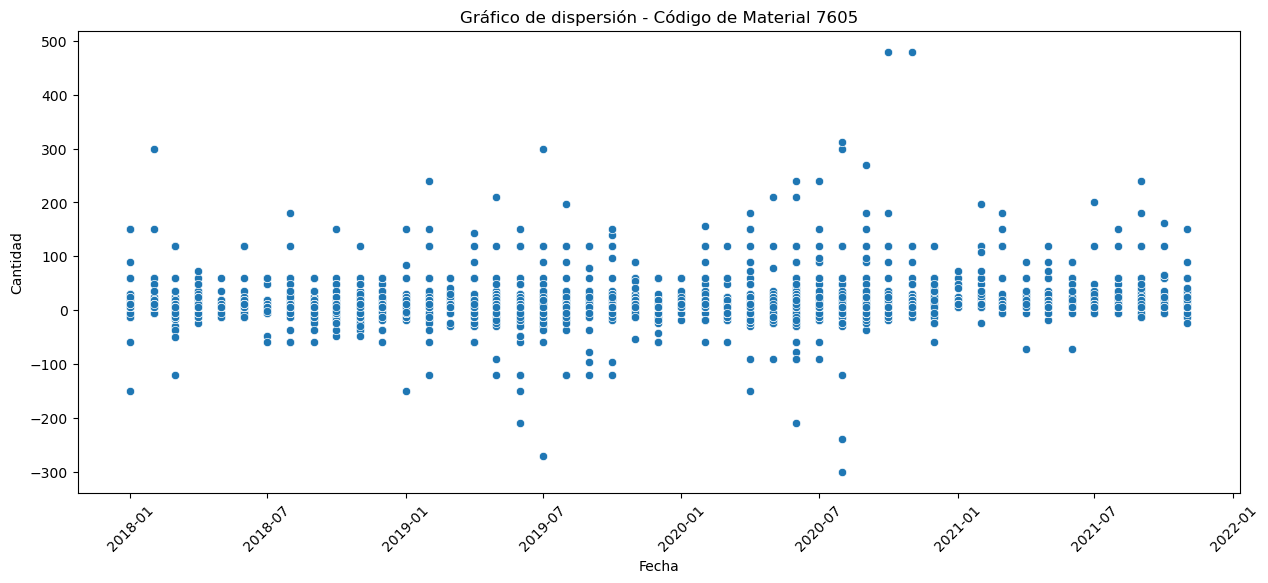

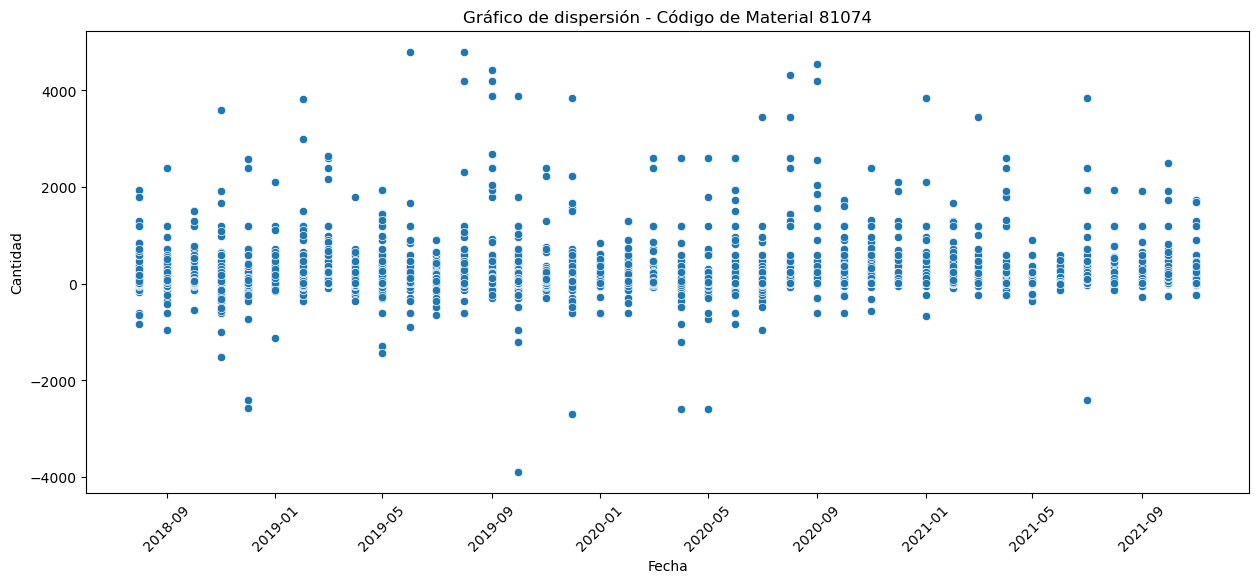

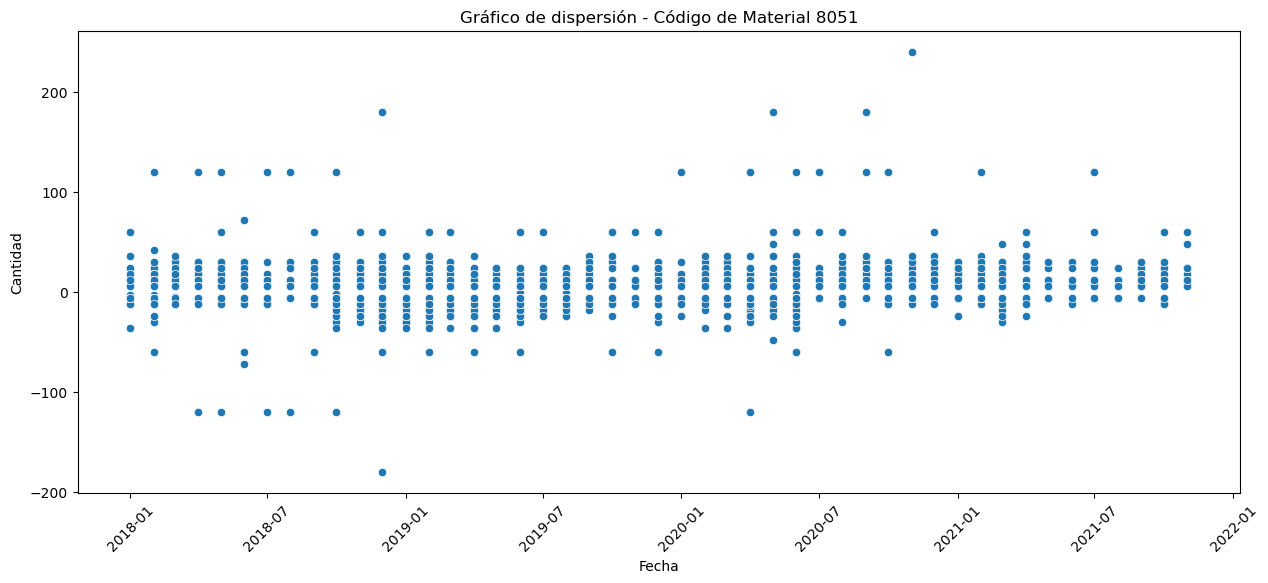

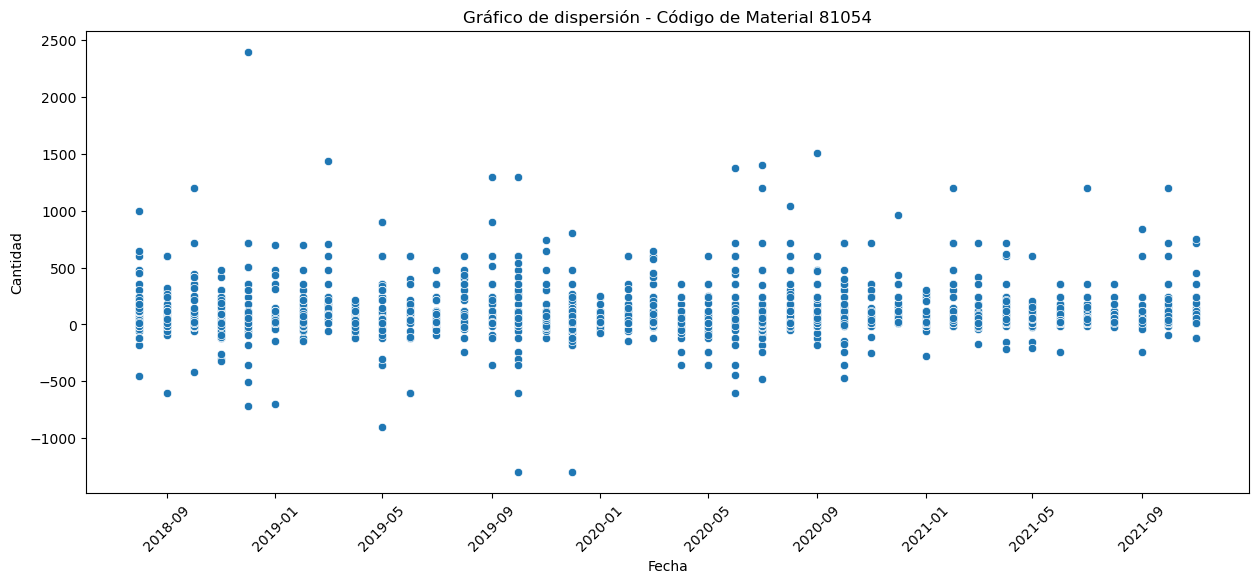

In [575]:
# Obtener los 5 productos más vendidos
top_5_productos = df_filter['CodMaterial'].value_counts().nlargest(5).index.tolist()

# Filtrar el DataFrame por los 5 productos más vendidos
df_top_5 = df_filter[df_filter['CodMaterial'].isin(top_5_productos)]

# Iterar sobre los 5 productos más vendidos y generar los gráficos individuales
for codigo in top_5_productos:
    # Filtrar los datos por el código de material actual
    df_codigo = df_top_5[df_top_5['CodMaterial'] == codigo]

    plt.figure(figsize=(15, 6))
    sns.scatterplot(data=df_codigo, x='Fecha', y='Cantidad')

  
    plt.title(f'Gráfico de dispersión - Código de Material {codigo}')
 
    plt.xticks(rotation=45)

    plt.show()

Haciendo un simple analisis visual, podemos ver cierta estacionalidad o fluctuaciones en los productos mas comprados en el periodo de tiempo que tenemos en el DF. Pero tampoco es muy grande. Todo mantienen cierta estabilidad en su comportamiento. 

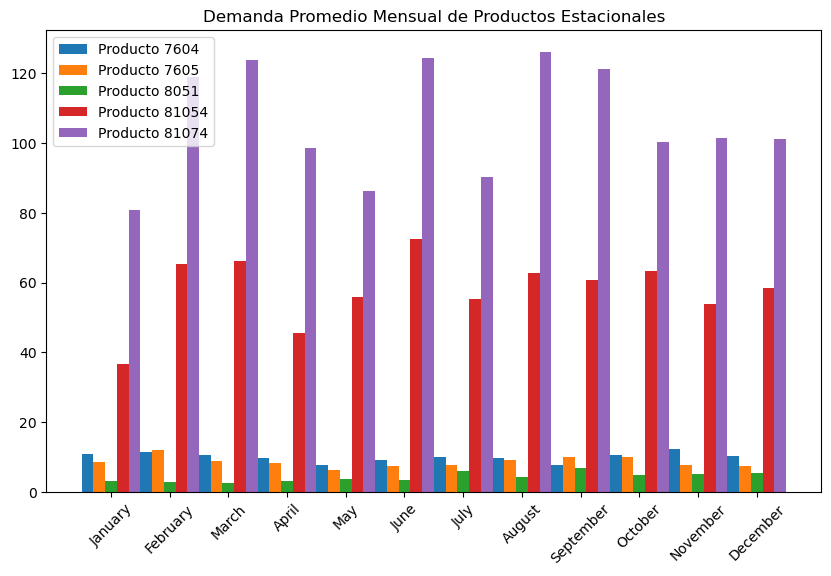

In [576]:
# Valores de los productos estacionales
productos_estacionales = [7604, 7605, 8051, 81054, 81074]

# Configuración del gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
meses = np.arange(12)
ancho_barras = 0.2

for i, codigo in enumerate(productos_estacionales):
    # Filtramos los datos por el código de material
    datos_material = df_filter[df_filter['CodMaterial'] == codigo]
    
    # Calculamos la demanda promedio por mes
    demanda_promedio_mes = datos_material.groupby('Mes')['Cantidad'].mean()
    
    # Posición de las barras
    posiciones_barras = meses + i * ancho_barras
    
    
    ax.bar(posiciones_barras, demanda_promedio_mes, width=ancho_barras, label=f'Producto {codigo}')

# Configuración de etiquetas y título
ax.set_title('Demanda Promedio Mensual de Productos Estacionales')

ax.set_xticks(meses + (len(productos_estacionales) - 1) * ancho_barras / 2)

ax.set_xticklabels(calendar.month_name[1:13], rotation=45)

ax.legend()

plt.show()

Haciendo un analisis de promedio de los años, podemos ver la fluctuacion promedio, como tememos meses de aumento seguidos de bajas de pedidos de los productos 7605, 7605, 8051, 81054 y para el 81074 vemos que es un poco mas estable. 